# Gruopwork_Wealth_Consumption

# Research Question

- Does household consume more when their wealth increases? 

- We are interested in the relationship between household wealth and private consumption. We expect to identify a positive relationship between consumption and wealth, using data for EU zone 20 countries, and Japan. Our methodology is OLS regression,Robust OLS,GLS and GLM, then we aim to compute Marginal Propensity to consume(MPC) and elasticity to represent the effect.

# 1 Import Data

## 1.1 EU 

In [61]:
 #Make sure to install ecbdata first
 #Run this line in terminal if not installed:
 #pip install ecbdata

In [1]:
# Some APIs or servers block requests from unknown proxies or anonymous sources for security reasons.
# If you're useing Mac OS, try disabling “Private Relay” in your iCloud settings — this may resolve the issue.
import pandas as pd
import matplotlib.pyplot as plt
from ecbdata import ecbdata
import os

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current working directory: {os.getcwd()}")

# Define save directory
save_dir = os.path.join("data", "raw data", "EU")
os.makedirs(save_dir, exist_ok=True)

# Download ECB data
eu_consumption = ecbdata.get_series('MNA.Q.Y.I9.W0.S1M.S1.D.P31._Z._Z._T.EUR.V.N')
eu_housing = ecbdata.get_series('DWA.Q.I9.S14.A.LE.NUN.HST.EUR.S.N')
eu_finance = ecbdata.get_series('DWA.Q.I9.S14.A.LE.F51M._Z.EUR.S.N')
eu_income = ecbdata.get_series("QSA.Q.N.I9.W0.S1M.S1._Z.B.B6G._Z._Z._Z.XDC._T.S.V.N._T")

# Save to CSV
eu_consumption.to_csv(os.path.join(save_dir, "consumption.csv"))
eu_housing.to_csv(os.path.join(save_dir, "housing_wealth.csv"))
eu_finance.to_csv(os.path.join(save_dir, "finance.csv"))
eu_income.to_csv(os.path.join(save_dir, "income.csv"))

print("EU Data downloaded successfully.")

Current working directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
EU Data downloaded successfully.


## 1.2 Japan

### 1.2.1 Resource

- **Consumption**: Household consumption expenditure (from Family Income and Expenditure Survey - 家計調査)
- **Housing Wealth**: Fixed assets (housing component) from National Accounts (SNA)
- **Stock Market Wealth**: Household financial assets (specifically "stocks") from National Accounts (SNA)
- **Income**: Compensation of employees from National Accounts (SNA)

### 1.2.2 Download Data
- Download household consumption data.

In [63]:
# Some APIs or servers block requests from unknown proxies or anonymous sources for security reasons.
# If you're useing Mac OS, try disabling “Private Relay” in your iCloud settings — this may resolve the issue.
import os
import requests

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Create directory if it doesn't exist
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# Define file path
save_path = os.path.join(save_dir, "household_consumption.xlsx")

# Download URL
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023ffm1n_jp.xlsx"

# Download and Save
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Download completed and saved as '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Download completed and saved as 'data/raw data/japan/household_consumption.xlsx'.


- Download stock market wealth data.
- Download houseing wealth data.

In [64]:
import os
import requests

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Create directory
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# Define file path
save_path = os.path.join(save_dir, "household_stock.xlsx")

# Download URL
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023si4_jp.xlsx"

# Download and Save
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Download completed and saved as '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Download completed and saved as 'data/raw data/japan/household_stock.xlsx'.


- Download income data (compensation of employees).

In [65]:
import os
import pandas as pd
import requests

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Create directory if it doesn't exist
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# Define file path
save_path = os.path.join(save_dir, "employment_income.xlsx")

# Download URL
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023ffm2_jp.xlsx"

# Download and Save
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

# Read back the file (optional step)
df = pd.read_excel(save_path)

# Re-save the file (optional, ensures formatting)
df.to_excel(save_path, index=False)

print(f"Employment income data downloaded and saved to '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Employment income data downloaded and saved to 'data/raw data/japan/employment_income.xlsx'.


# 2 Manipulate the data

## 2.1 EU

In [2]:
import os
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Define save directory
save_dir = os.path.join("data", "raw data", "EU")

# Load data
consumption = pd.read_csv(os.path.join(save_dir, "consumption.csv"))
housing = pd.read_csv(os.path.join(save_dir, "housing_wealth.csv"))
finance = pd.read_csv(os.path.join(save_dir, "finance.csv"))
income = pd.read_csv(os.path.join(save_dir, "income.csv"))

# Process data
def preprocess(df, value_name):
    df = df[['TIME_PERIOD', 'OBS_VALUE']].dropna()
    df = df.rename(columns={'TIME_PERIOD': 'date', 'OBS_VALUE': value_name})
    df['date'] = pd.PeriodIndex(df['date'], freq='Q').to_timestamp()
    df = df[(df['date'] >= '2009-01-01') & (df['date'] <= '2024-10-01')]
    return df

# Preprocess data by flame
consumption = preprocess(consumption, 'consumption')
housing = preprocess(housing, 'housing_wealth')
finance = preprocess(finance, 'financial_assets')
income = preprocess(income, 'income')


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption


## 2.2 Japan

- Manipulate household consumption data.

In [67]:
import os
import sys
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# Add 'src' to sys.path
sys.path.append("src")
from data_function.extract_household_consumption import extract_household_consumption

# Define paths
save_path = "data/raw data/japan/household_consumption.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_household_consumption.csv")

# Create directory if not exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Extract and save
consumption_data = extract_household_consumption(save_path)
consumption_data.to_csv(processed_path, index=False)

print(f"Processed data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed data saved to: data/processing_data/japan/processed_household_consumption.csv


- Manipulate
  - stock market wealth data.
  - houseing wealth data.

In [68]:
import os
import sys
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# Add 'src' to sys.path
sys.path.append("src")
from data_function.extract_housing_and_stock import extract_housing_and_stock

# Define paths
file_path = "data/raw data/japan/household_stock.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_household_stock.csv")

# Create directories if not exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Extract and save
processed_data = extract_housing_and_stock(file_path)
processed_data.to_csv(processed_path, index=False)

print(f"Processed data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed data saved to: data/processing_data/japan/processed_household_stock.csv


- Manipulate income data (compensation of employees).

In [69]:
import os
import sys
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# Add 'src' to sys.path
sys.path.append("src")
from data_function.extract_employment_income import extract_employment_income

# Define paths
file_path = "data/raw data/japan/employment_income.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_employment_income.csv")

# Create directories if not exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Extract and save
processed_employment_income = extract_employment_income(file_path)
processed_employment_income.to_csv(processed_path, index=False)

print(f"Processed employment income data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed employment income data saved to: data/processing_data/japan/processed_employment_income.csv


# 3 Merge the data

## 3.1 EU

In [3]:
import os

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Define file paths
clean_path = "data/clean/EU"

# Merge by date
merged = consumption.merge(housing, on='date', how='outer') \
                    .merge(finance, on='date', how='outer') \
                    .merge(income, on='date', how='outer')

# Create clean directory if not exists
os.makedirs(clean_path, exist_ok=True)

# Save clean merged data
merged_path = os.path.join(clean_path, "merged_eu_data.csv")
merged.to_csv(merged_path, index=False)
print(merged.head())

print(f"Merged dataset saved successfully at {merged_path}!")

Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
        date   consumption  housing_wealth  financial_assets        income
0 2009-01-01  1.314874e+06       939390.47        2433442.25  1.470215e+06
1 2009-04-01  1.315670e+06       935309.12        2473142.39  1.592684e+06
2 2009-07-01  1.318606e+06       944321.11        2576393.26  1.485458e+06
3 2009-10-01  1.326607e+06       950845.01        2564141.07  1.565082e+06
4 2010-01-01  1.334493e+06       951515.77        2587176.63  1.481388e+06
Merged dataset saved successfully at data/clean/EU/merged_eu_data.csv!


## 3.2 Japan

In [71]:
import os
import pandas as pd

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Define file paths
raw_path = "data/processing_data/japan/"
clean_path = "data/clean/japan"

csv_files = {
    "household_consumption": os.path.join(raw_path, "processed_household_consumption.csv"),
    "housing_stock_wealth": os.path.join(raw_path, "processed_household_stock.csv"),
    "employee_income": os.path.join(raw_path, "processed_employment_income.csv"),
}

# Read dataset
consumption = pd.read_csv(csv_files["household_consumption"])
housing_stock = pd.read_csv(csv_files["housing_stock_wealth"])
employee_income = pd.read_csv(csv_files["employee_income"])

# Merge on 'year'
merged_data = consumption.merge(
    housing_stock, on="year", how="inner"
).merge(
    employee_income, on="year", how="inner"
)

# Check merged dataset
print(merged_data.head())
print(merged_data.columns)

# Round value columns
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns].round(0).astype(int)

# Create clean directory if not exists
os.makedirs(clean_path, exist_ok=True)

# Save merged data
merged_path = os.path.join(clean_path, "merged_macro_data.csv")
merged_data.to_csv(merged_path, index=False)

print(f"Merged dataset saved successfully at {merged_path}!")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
   year  household_consumption  fixed_asset  stock_asset  employment_income
0  1994             266250.900   397066.400   130971.400         262822.600
1  1995             271381.700   399831.500   128776.700         267095.200
2  1996             278702.400   416861.500   118755.900         272962.400
3  1997             279745.500   423410.600    86465.800         279054.200
4  1998             278920.200   418589.800    80110.800         273370.200
Index(['year', 'household_consumption', 'fixed_asset', 'stock_asset',
       'employment_income'],
      dtype='object')
Merged dataset saved successfully at data/clean/japan/merged_macro_data.csv!


# 4 Descriptive Statistics

## 4.1 EU

### 4.1.1 Indicator 

In [5]:
import pandas as pd
import os

# Load data
merged_path = os.path.join("data", "clean", "EU", "merged_eu_data.csv")
df_merge = pd.read_csv(merged_path, parse_dates=['date'])

# Show full descriptive statistics
print("Descriptive Statistics:")
print(df_merge[['consumption', 'housing_wealth','financial_assets','income']].describe())

Descriptive Statistics:
        consumption  housing_wealth  financial_assets        income
count  6.400000e+01    6.400000e+01      6.400000e+01  6.400000e+01
mean   1.550830e+06    1.062096e+06      3.950816e+06  1.786037e+06
std    2.020929e+05    1.304206e+05      1.150425e+06  2.543454e+05
min    1.314874e+06    9.147858e+05      2.433442e+06  1.470215e+06
25%    1.392866e+06    9.520339e+05      2.816647e+06  1.592234e+06
50%    1.497452e+06    1.019445e+06      3.928425e+06  1.703921e+06
75%    1.624710e+06    1.133254e+06      4.843694e+06  1.901443e+06
max    2.026259e+06    1.330407e+06      6.028015e+06  2.438200e+06


### 4.2.2 Growth Rate

In [6]:
# Calculate QoQ Growth Rate
df_growth = df_merge.copy()
df_growth['consumption_growth'] = df_growth['consumption'].pct_change() * 100
df_growth['housing_growth'] = df_growth['housing_wealth'].pct_change() * 100
df_growth['finance_growth'] = df_growth['financial_assets'].pct_change() * 100
df_growth['income_growth'] = df_growth['income'].pct_change() * 100
df_growth_clean = df_growth.dropna(subset=[
    'consumption_growth', 'housing_growth', 'finance_growth', 'income_growth'
])

# Show first few rows of growth rate
print("Growth Rates (% QoQ) without NaNs:")
print(df_growth_clean[['date', 'consumption_growth', 'housing_growth', 'finance_growth', 'income_growth']].head())


Growth Rates (% QoQ) without NaNs:
        date  consumption_growth  housing_growth  finance_growth  \
1 2009-04-01            0.060537       -0.434468        1.631440   
2 2009-07-01            0.223128        0.963531        4.174886   
3 2009-10-01            0.606806        0.690856       -0.475556   
4 2010-01-01            0.594463        0.070544        0.898373   
5 2010-04-01            0.835155        1.365674       -2.047182   

   income_growth  
1       8.329978  
2      -6.732396  
3       5.360243  
4      -5.347608  
5       8.411097  


## 4.2 Japan

### 4.2.1 Indicator 

In [74]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import os

# Move to project root safely
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Load merged data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)
# Show descriptive statistics
print("Descriptive Statistics (Original Data):")
# print(merged_data.describe())

# Convert values to billion yen (divide by 1000)
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns] / 1000

# Show descriptive statistics again after conversion
print("\nDescriptive Statistics (Converted to Billion Yen):")
print(merged_data.describe())


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Descriptive Statistics (Original Data):

Descriptive Statistics (Converted to Billion Yen):
          year  household_consumption  fixed_asset  stock_asset  \
count   30.000                 30.000       30.000       30.000   
mean  2008.500                286.519      410.730      143.438   
std      8.803                  9.774       13.696       48.361   
min   1994.000                266.251      385.535       80.111   
25%   2001.250                280.427      401.290      102.274   
50%   2008.500                283.809      409.338      134.562   
75%   2015.750                291.108      418.097      178.615   
max   2023.000                314.756      443.824      250.212   

       employment_income  
count             30.000  
mean             268.422  
std               13.730  
min              251.155  
25%              257.151  
50%              266.433  
75%              273.625  
max      

### 4.2.2 Growth Rate

In [75]:
# Load merged data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Convert values to billion yen
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns] / 1000

# Calculate growth rates (%)
growth_data = merged_data.copy()
for col in value_columns:
    growth_data[col + "_growth"] = growth_data[col].pct_change() * 100

# Drop the first row with NaNs due to pct_change
growth_data = growth_data.dropna().reset_index(drop=True)

# Show descriptive statistics of growth rates
growth_columns = [col + "_growth" for col in value_columns]
print("Descriptive Statistics of Growth Rates (%):")
print(growth_data[growth_columns].describe().round(2))


Descriptive Statistics of Growth Rates (%):
       household_consumption_growth  fixed_asset_growth  stock_asset_growth  \
count                        29.000              29.000              29.000   
mean                          0.600               0.380               5.180   
std                           1.960               2.200              26.140   
min                          -5.290              -4.690             -39.150   
25%                          -0.240              -0.970              -9.100   
50%                           0.560               0.310              -0.450   
75%                           1.070               1.570              15.590   
max                           6.080               7.610              72.450   

       employment_income_growth  
count                    29.000  
mean                      0.500  
std                       1.950  
min                      -4.840  
25%                      -0.660  
50%                       1.110  
75%   

# 5 Visualization

## 5.1 EU

### 5.1.1 Time Series Plot

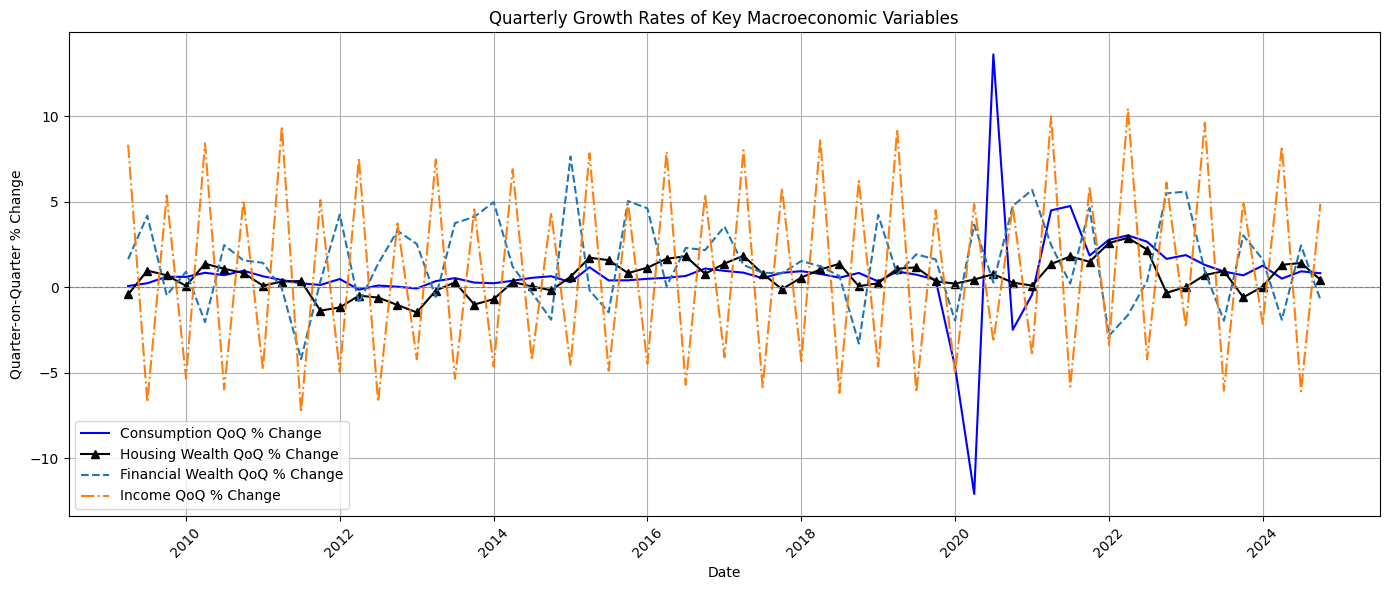

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_merge['consumption_qoq_pct'] = df_merge['consumption'].pct_change(1) * 100
df_merge['housing_wealth_qoq_pct'] = df_merge['housing_wealth'].pct_change(1) * 100
df_merge['financial_wealth_qoq_pct'] = df_merge['financial_assets'].pct_change(1) * 100
df_merge['income_qoq_pct'] = df_merge['income'].pct_change(1) * 100

plt.figure(figsize=(14, 6))
plt.plot(df_merge['date'], df_merge['consumption_qoq_pct'], label='Consumption QoQ % Change', color='blue')
plt.plot(df_merge['date'], df_merge['housing_wealth_qoq_pct'], label='Housing Wealth QoQ % Change', color='black', marker='^', linestyle='-')
plt.plot(df_merge['date'], df_merge['financial_wealth_qoq_pct'], label='Financial Wealth QoQ % Change', linestyle='--')
plt.plot(df_merge['date'], df_merge['income_qoq_pct'], label='Income QoQ % Change', linestyle='-.')

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Quarter-on-Quarter % Change')
plt.title('Quarterly Growth Rates of Key Macroeconomic Variables')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


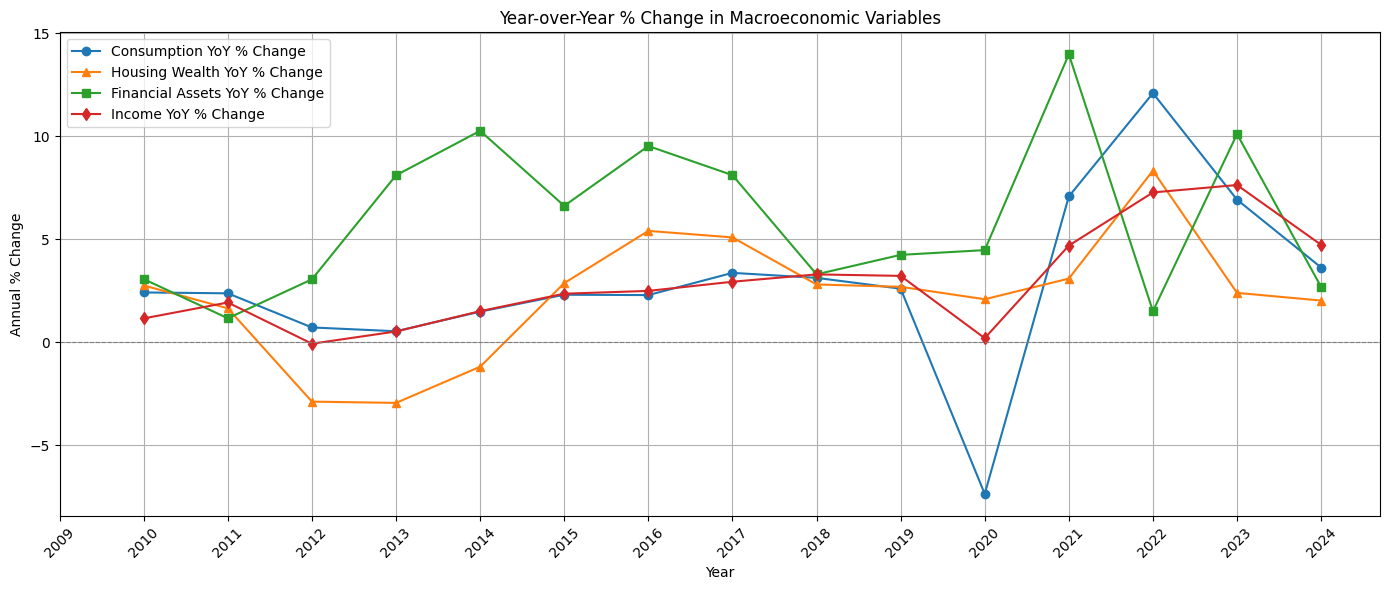

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_merge['year'] = df_merge['date'].dt.year
annual_avg = df_merge.groupby('year')[['consumption', 'housing_wealth', 'financial_assets', 'income']].mean().reset_index()

annual_avg['consumption_yoy_pct'] = annual_avg['consumption'].pct_change() * 100
annual_avg['housing_wealth_yoy_pct'] = annual_avg['housing_wealth'].pct_change() * 100
annual_avg['financial_assets_yoy_pct'] = annual_avg['financial_assets'].pct_change() * 100
annual_avg['income_yoy_pct'] = annual_avg['income'].pct_change() * 100

plt.figure(figsize=(14, 6))

plt.plot(annual_avg['year'], annual_avg['consumption_yoy_pct'], label='Consumption YoY % Change', marker='o')
plt.plot(annual_avg['year'], annual_avg['housing_wealth_yoy_pct'], label='Housing Wealth YoY % Change', marker='^')
plt.plot(annual_avg['year'], annual_avg['financial_assets_yoy_pct'], label='Financial Assets YoY % Change', marker='s')
plt.plot(annual_avg['year'], annual_avg['income_yoy_pct'], label='Income YoY % Change', marker='d')

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Year-over-Year % Change in Macroeconomic Variables')
plt.xlabel('Year')
plt.ylabel('Annual % Change')
plt.xticks(annual_avg['year'], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

These line charts illustrate the quarter-on-quarter and year-over-year percentage changes in four key household macroeconomic variables in the EU—consumption, housing wealth, financial assets, and income—from 2009 to 2024.
1. Quarter-on-Quarter Dynamics (Top Chart)
  - The quarterly fluctuations in income are the most volatile, showing pronounced seasonal patterns.
  - Housing wealth and consumption show relatively stable movements with small but synchronized quarterly growth patterns.
  - The COVID-19 shock in early 2020 is sharply visible, especially in consumption, which dropped by nearly 15% in a single quarter.
  - Notably, both housing wealth and financial assets rebounded quickly, underscoring the asset-side resilience of households during the recovery phase.
2. Year-over-Year Trends (Bottom Chart)
 - Consumption shows a steady but moderate annual growth trend, except for the sharp contraction in 2020 and strong rebound in 2021–2022.
3. Implications
 - The relationship between housing wealth and consumption growth, while present, appears more modest and lagged than that of financial assets.
 - These trends may reflect changes in wealth effects, savings behavior, or macroprudential responses across the EU.

### 5.1.2 Normality

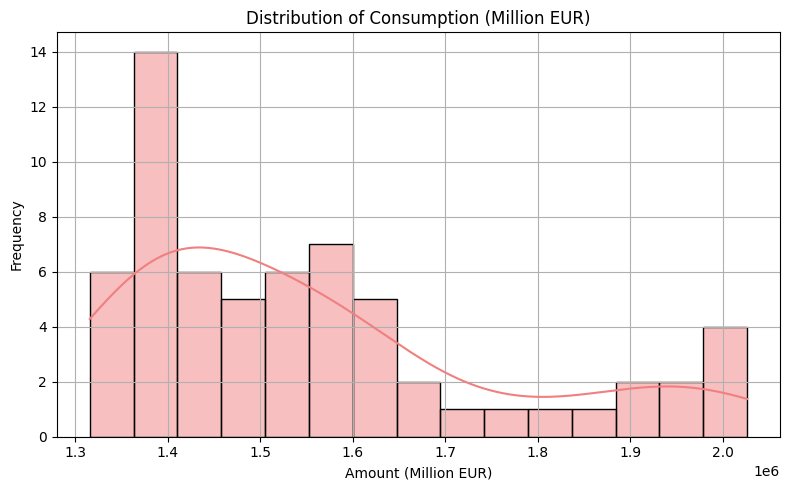

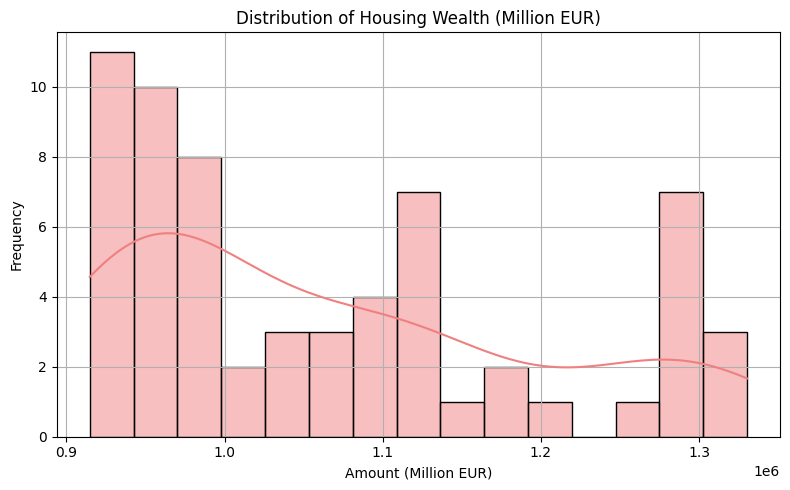

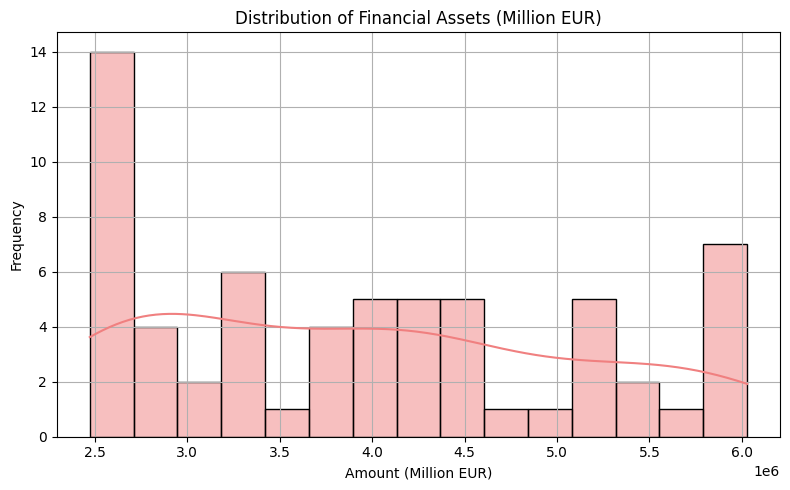

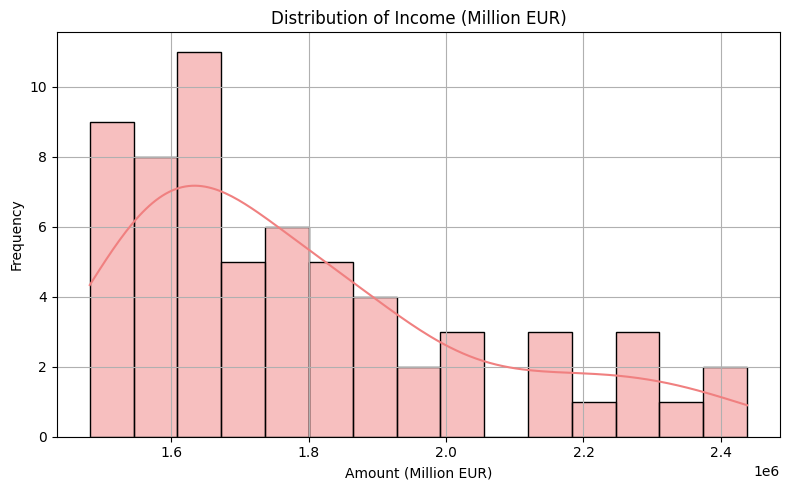

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load values
value_columns = [
    'consumption',
    'housing_wealth',
    'financial_assets',
    'income'
]

# Plot histograms for each variable
for col in value_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_growth_clean[col], bins=15, kde=True, color='lightcoral')
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (Million EUR)")
    plt.xlabel("Amount (Million EUR)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

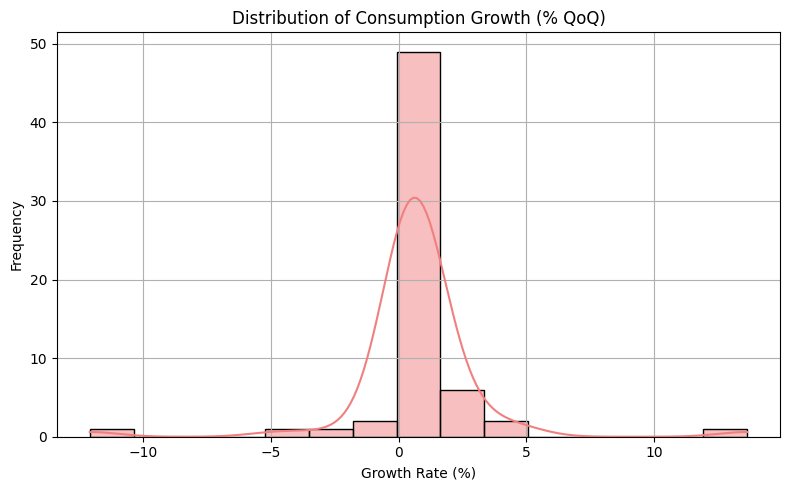

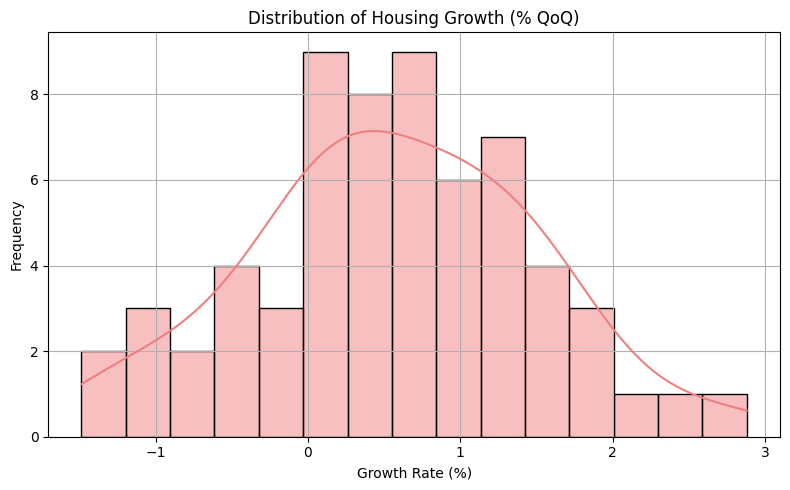

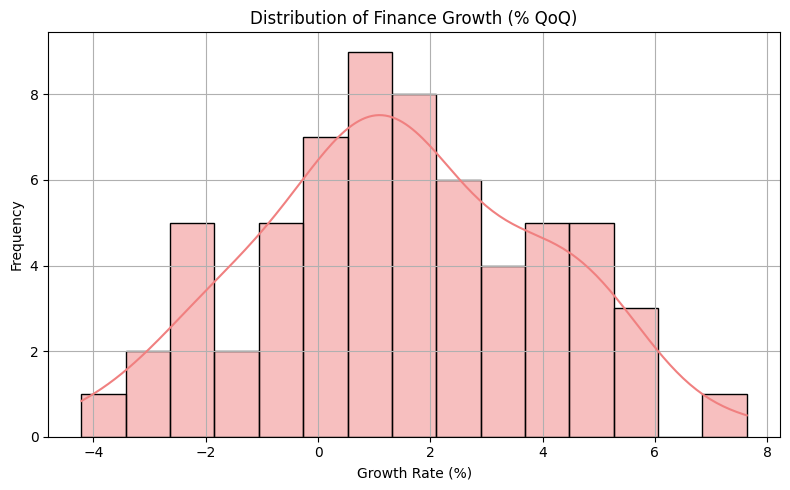

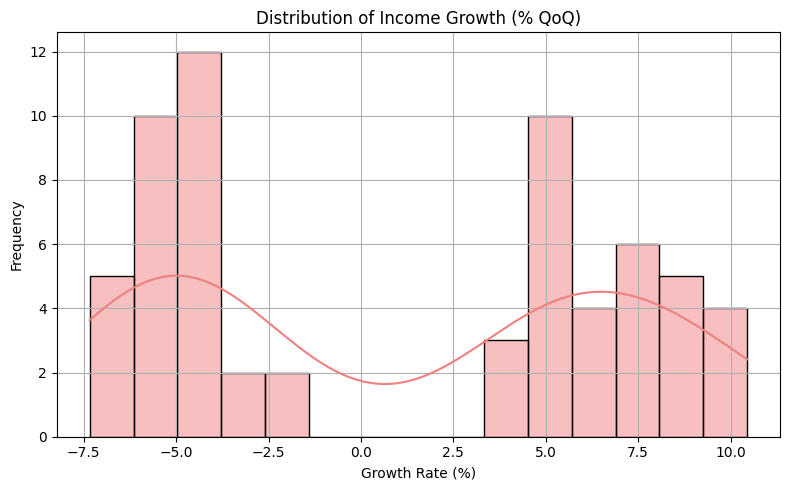

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load values
value_columns = [
    'consumption_growth',
    'housing_growth',
    'finance_growth',
    'income_growth'
]

# Plot histograms for each growth variable
for col in value_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_growth_clean[col], bins=15, kde=True, color='lightcoral')
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (% QoQ)")
    plt.xlabel("Growth Rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 - After converting the data into growth rates, the distribution exhibited improved normality.

## 5.2 Japan

### 5.2.1 Indicator Plot

#### 5.2.1.1 Line Plot

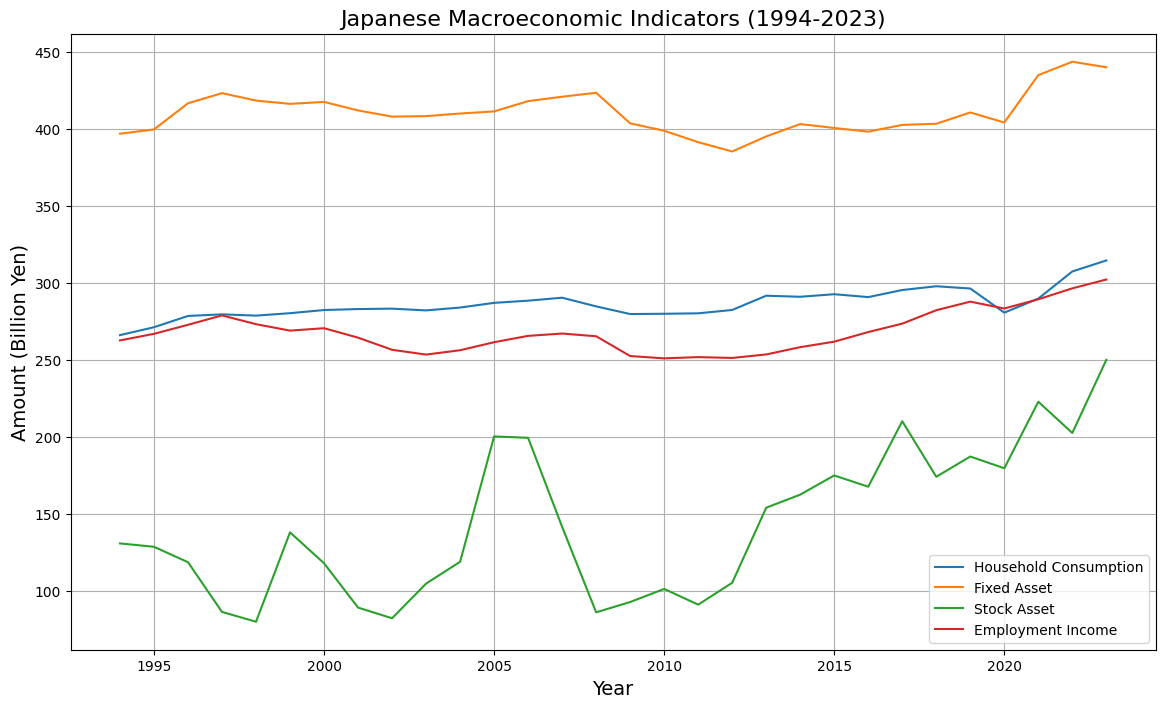

In [11]:
# Load merged data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Convert values to billion yen
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns] / 1000

# Plotting
plt.figure(figsize=(14, 8))

# Plot each variable
for column in value_columns:
    plt.plot(merged_data['year'], merged_data[column], label=column.replace('_', ' ').title())

# Title and labels
plt.title("Japanese Macroeconomic Indicators (1994-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount (Billion Yen)", fontsize=14)
plt.legend()
plt.grid(True)

# Save the figure if needed
# plt.savefig("macro_data_trends.png", dpi=300)

plt.show()


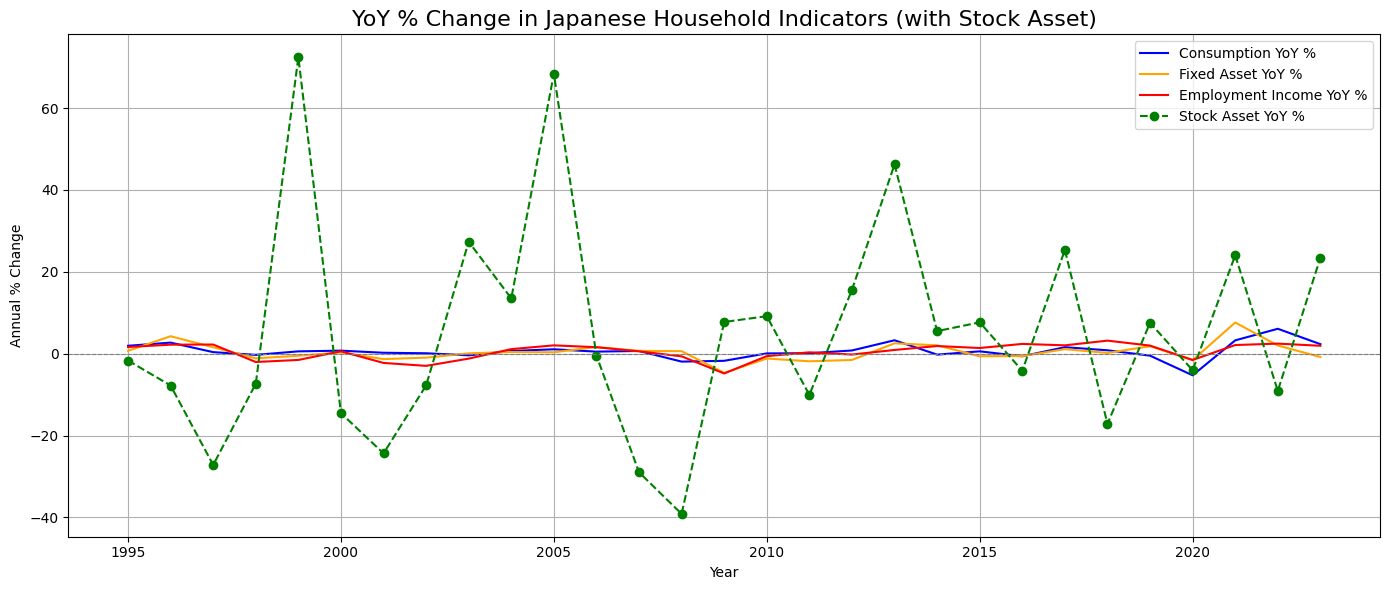

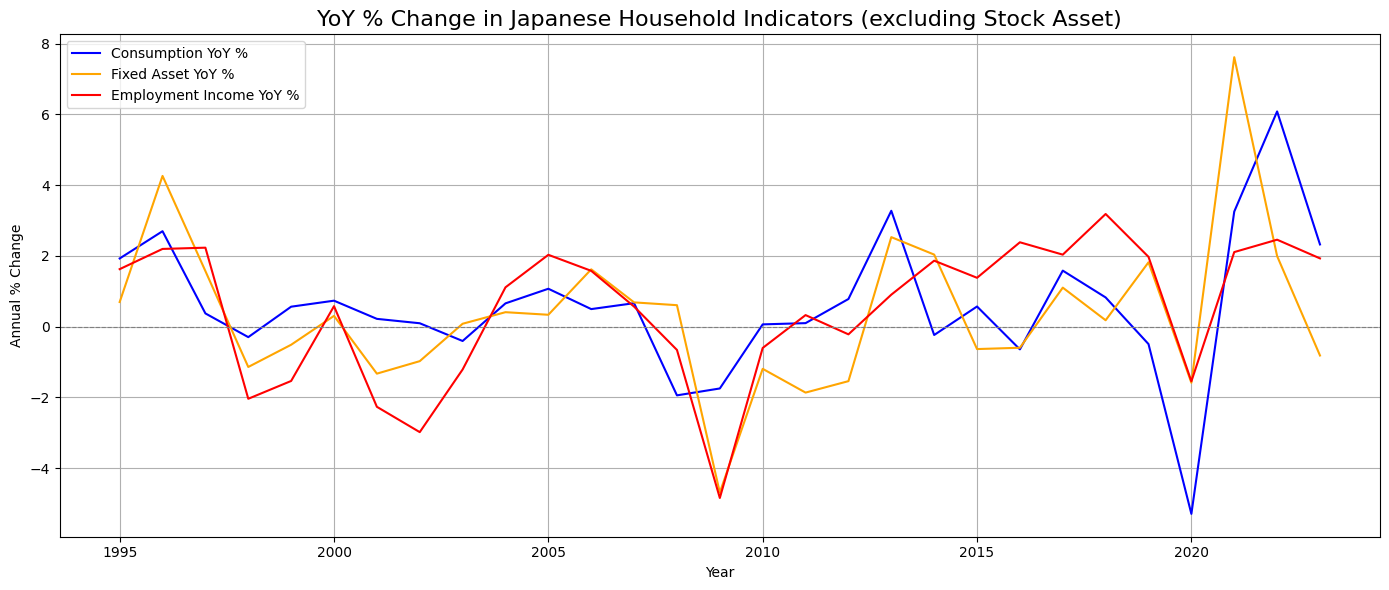

In [17]:
# Load Data
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
# value_columns = ['household_consumption', 'fixed_asset', 'employment_income']

# Calculate Yearly Growth Rate
for col in value_columns:
    merged_data[f"{col}_yoy_pct"] = merged_data[col].pct_change() * 100

# Plot Four Key Indicates
plt.figure(figsize=(14, 6))

plt.plot(merged_data['year'], merged_data['household_consumption_yoy_pct'], label='Consumption YoY %', color='blue')
plt.plot(merged_data['year'], merged_data['fixed_asset_yoy_pct'], label='Fixed Asset YoY %', color='orange')
plt.plot(merged_data['year'], merged_data['employment_income_yoy_pct'], label='Employment Income YoY %', color='red')
plt.plot(merged_data['year'], merged_data['stock_asset_yoy_pct'], label='Stock Asset YoY %', color='green', linestyle='--', marker='o')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("YoY % Change in Japanese Household Indicators (with Stock Asset)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Annual % Change")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot and Show the Trends in Details
plt.figure(figsize=(14, 6))

plt.plot(merged_data['year'], merged_data['household_consumption_yoy_pct'], label='Consumption YoY %', color='blue')
plt.plot(merged_data['year'], merged_data['fixed_asset_yoy_pct'], label='Fixed Asset YoY %', color='orange')
plt.plot(merged_data['year'], merged_data['employment_income_yoy_pct'], label='Employment Income YoY %', color='red')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("YoY % Change in Japanese Household Indicators (excluding Stock Asset)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Annual % Change")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Case Study: 

Key Economic Shocks in Japan
- **Post-Bubble Stagnation (Late 1990s)**:
From 1994 onwards, both household consumption and employment income showed sluggish growth, reflecting Japan’s long stagnation after the burst of its asset bubble. Stock assets were highly volatile, indicating unstable investor sentiment.

- **2008 Global Financial Crisis**:
Around 2008, stock assets dropped sharply, reflecting global equity market turmoil. Household consumption and income showed mild declines, while fixed assets remained relatively stable, suggesting resilience in the real estate sector.

- **COVID-19 Pandemic (2020)**:
In 2020, all indicators showed disturbances. Stock assets fluctuated dramatically, while household consumption and employment income declined, indicating uncertainty in earnings and spending. Fixed assets showed modest change, again acting as a stabilizer.

Additional Insights from the Long-Term Trends
- Household consumption and employment income are tightly coupled, suggesting that Japanese consumer behavior is still strongly **income-driven**. Wealth effects (from asset appreciation) appear limited.

- Fixed asset values (housing wealth) exhibit a stable, long-term upward trend, especially after 2013. This may reflect the impact of Abenomics and ultra-low interest rates, positioning **real estate as a safer household asset class**.

- Stock assets show extreme volatility, with repeated surges and collapses. This indicates that financial markets are highly sensitive to global and domestic shocks, limiting their effectiveness as long-term household wealth vehicles.

- Post-2020 recovery across all indicators suggests short-term policy success, but the sustainability of this recovery—especially in real income and consumption—remains uncertain.


Overall, the chart shows steady growth in real economy indicators (consumption and income), while financial wealth (stock assets) exhibits more volatility, indicating different dynamics in asset accumulation and income.


#### 5.2.1.2 Normality

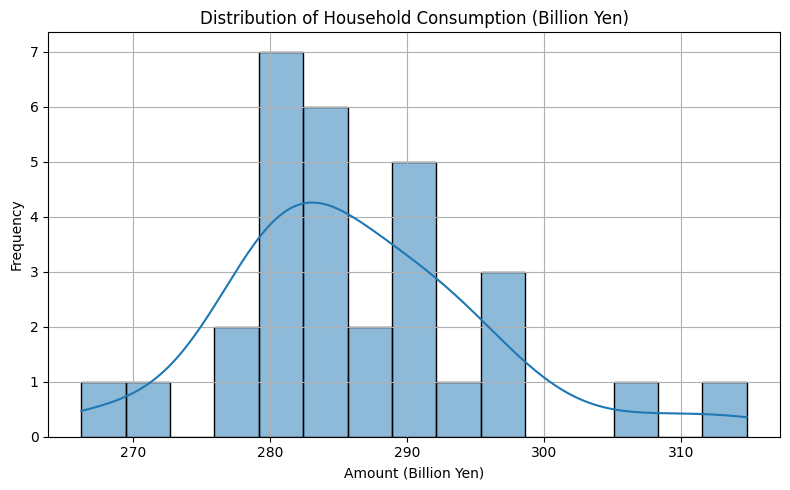

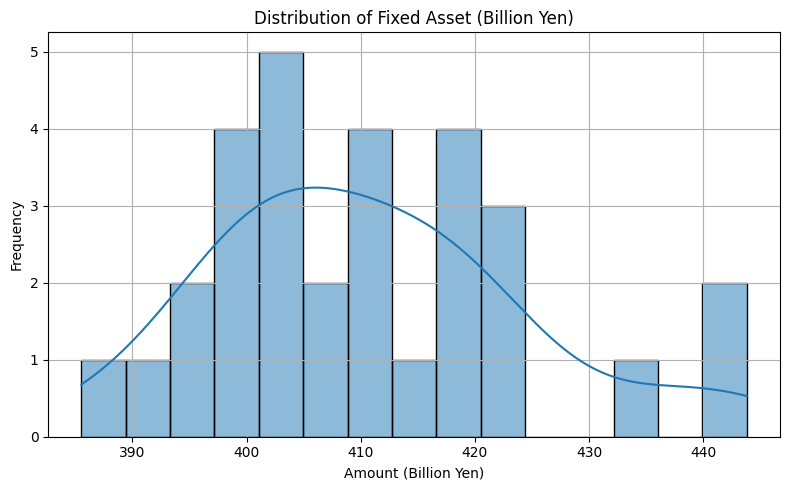

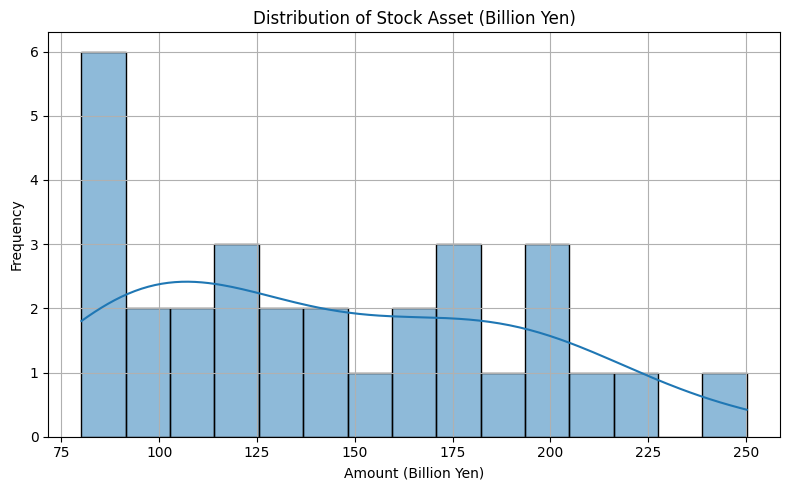

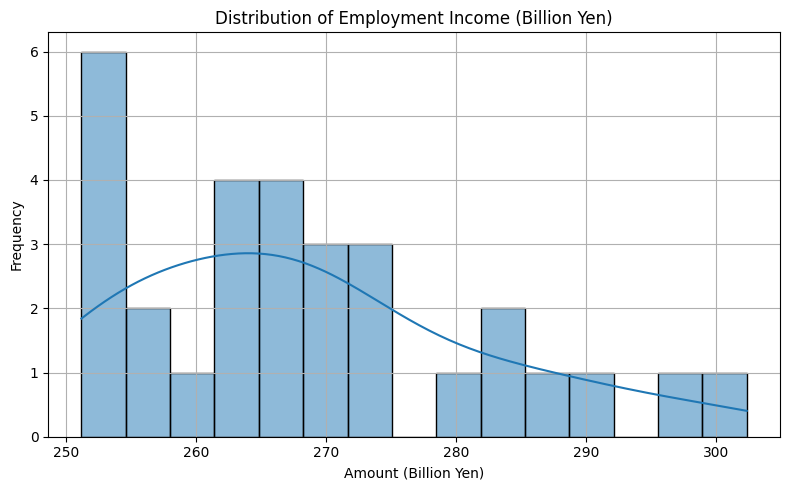

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each growth variable
for col in value_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged_data[col], bins=15, kde=True)
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (Billion Yen)")
    plt.xlabel("Amount (Billion Yen)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

1️⃣ Household Consumption
- The distribution is slightly right-skewed, with most values centered around 280–290 billion yen. This suggests a generally stable level of household consumption with a few years of stronger spending.

2️⃣ Fixed Asset
- The values are more symmetrically distributed, centered around 400–420 billion yen. This indicates that fixed assets (mainly housing wealth) remained relatively steady over time, with moderate variation.

3️⃣ Stock Asset
- This distribution is left-skewed, with a concentration of values below 150 billion yen, and a long tail toward higher values. This reflects occasional spikes in financial asset holdings, but most years show modest stock wealth.

4️⃣ Employment Income
- The distribution is right-skewed, peaking around 255–270 billion yen. It implies that labor income is relatively consistent across years, with a few outlier years of higher income likely due to economic upturns or wage policy changes.



### 5.2.2 Change of Indicator Plot

#### 5.2.2.1 Growth Rate

- Histograms of Growth Rates

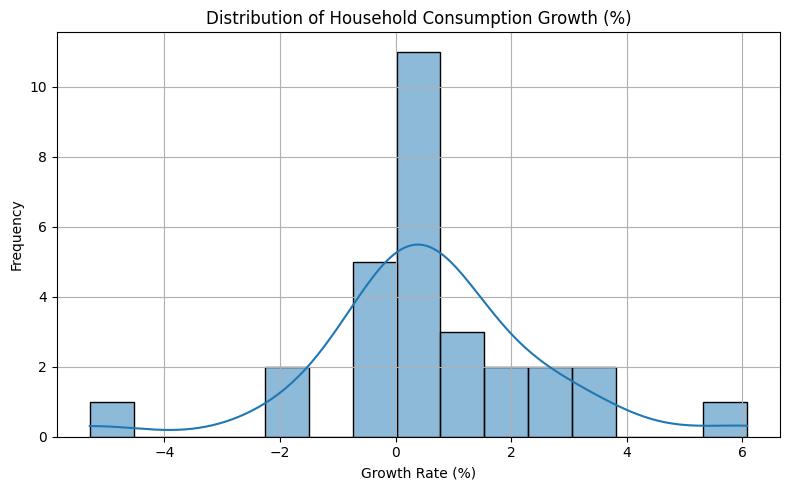

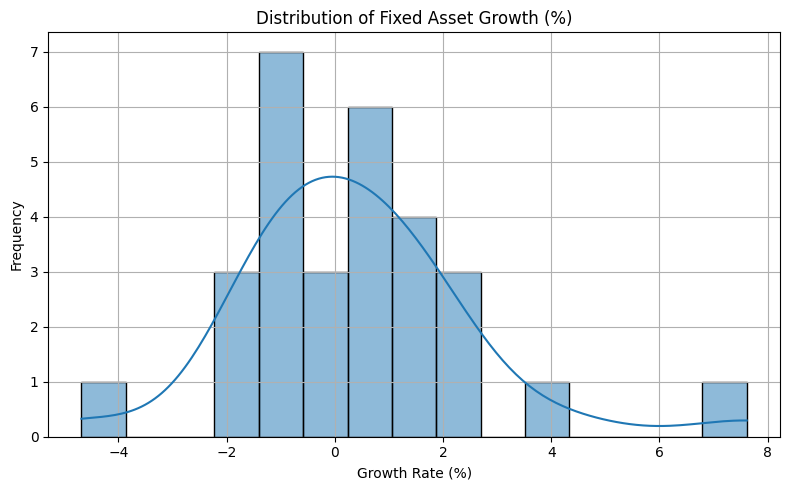

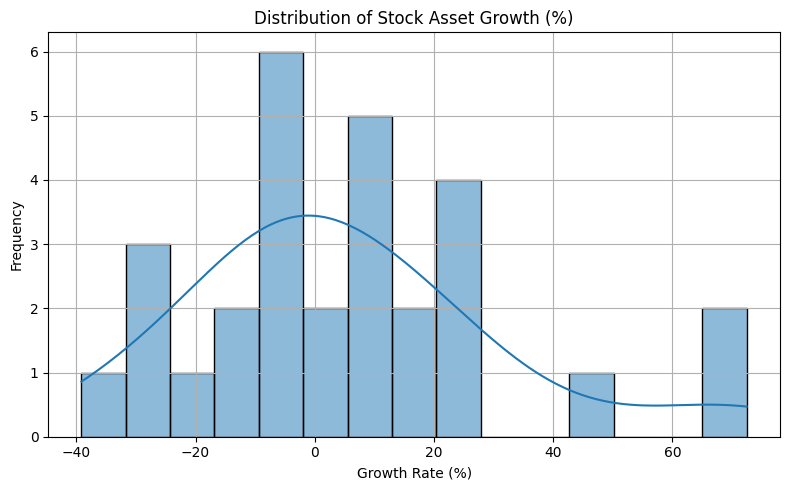

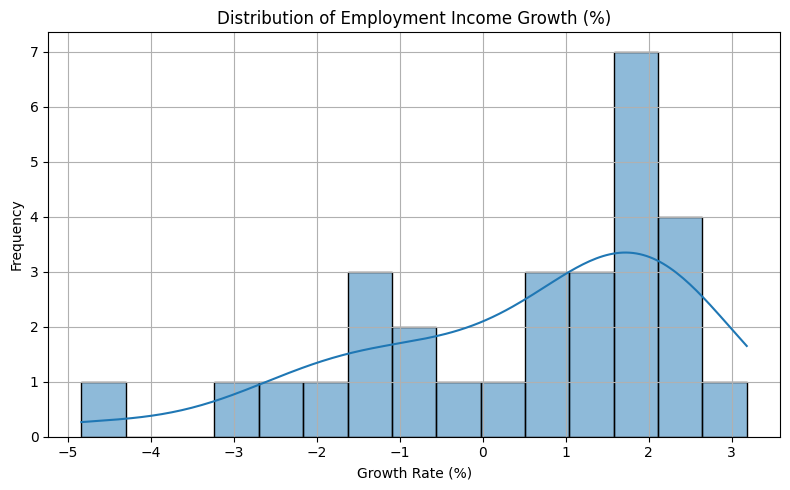

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each growth variable
for col in growth_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(growth_data[col], bins=15, kde=True)
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (%)")
    plt.xlabel("Growth Rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


1️⃣ Distribution of Household Consumption Growth (%)
- This distribution is centered around 0%, indicating low but stable growth in household consumption.
Most values fall between -2% and 2%, with a few outliers on both sides. The bell shape suggests near-normality with slight skew.

2️⃣ Distribution of Fixed Asset Growth (%)
- The fixed asset growth distribution is also centered near zero, but with a wider spread than consumption.
It shows a slightly positive skew, indicating more frequent small declines and occasional strong positive growth years.

3️⃣ Distribution of Stock Asset Growth (%)
- This distribution is highly spread out and skewed, reflecting the high volatility of stock markets.
Growth rates range from -40% to over +60%, with frequent large fluctuations, indicating risk and opportunity in financial assets.

4️⃣ Distribution of Employment Income Growth (%)
- This distribution is right-skewed, with most growth rates clustered between 0% and 2%.
It shows that income tends to grow slowly and steadily, with fewer instances of negative growth or large increases.

- Shapiro-Wilk Normality Test

In [82]:
from scipy.stats import shapiro

# Lists to hold variable
normal_vars = []
non_normal_vars = []

# Loop through each growth rate variable
print("Shapiro-Wilk Normality Test Results:\n")
for col in growth_columns:
    stat, p = shapiro(growth_data[col].dropna())
    result = f"{col}: W = {stat:.4f}, p-value = {p:.4f}"
    
    if p >= 0.05:
        normal_vars.append(result)
    else:
        non_normal_vars.append(result)

# Print variables that pass or not pass the normality test
print("Passed (Approximately Normal):")
for r in normal_vars:
    print("  ", r)

print("\nNot Normal (Rejected Normality):")
for r in non_normal_vars:
    print("  ", r)

Shapiro-Wilk Normality Test Results:

Passed (Approximately Normal):
   stock_asset_growth: W = 0.9340, p-value = 0.0700

Not Normal (Rejected Normality):
   household_consumption_growth: W = 0.9083, p-value = 0.0156
   fixed_asset_growth: W = 0.9117, p-value = 0.0189
   employment_income_growth: W = 0.9049, p-value = 0.0128


#### 5.2.2.2 Growth Rate of Log-Differenced

In [83]:
import numpy as np

# Copy data
logdiff_data = merged_data.copy()

# Apply log transformation and first difference
for col in value_columns:
    log_col = f"log_{col}"
    logdiff_col = f"logdiff_{col}"

    logdiff_data[log_col] = np.log(logdiff_data[col])
    logdiff_data[logdiff_col] = logdiff_data[log_col].diff() * 100  # as % change

# Drop NaN from first difference
logdiff_data = logdiff_data.dropna().reset_index(drop=True)

# Select only the log-differenced columns for display
logdiff_columns = [f"logdiff_{col}" for col in value_columns]
print("Descriptive Statistics of Log-Differenced (% Growth Approximation):")
print(logdiff_data[logdiff_columns].describe().round(3))


Descriptive Statistics of Log-Differenced (% Growth Approximation):
       logdiff_household_consumption  logdiff_fixed_asset  \
count                         29.000               29.000   
mean                           0.577                0.356   
std                            1.952                2.169   
min                           -5.434               -4.798   
25%                           -0.235               -0.979   
50%                            0.563                0.305   
75%                            1.066                1.559   
max                            5.903                7.338   

       logdiff_stock_asset  logdiff_employment_income  
count               29.000                     29.000  
mean                 2.232                      0.483  
std                 23.969                      1.960  
min                -49.680                     -4.961  
25%                 -9.536                     -0.659  
50%                 -0.454                    

- Histograms of Log-Differenced Growth Rates

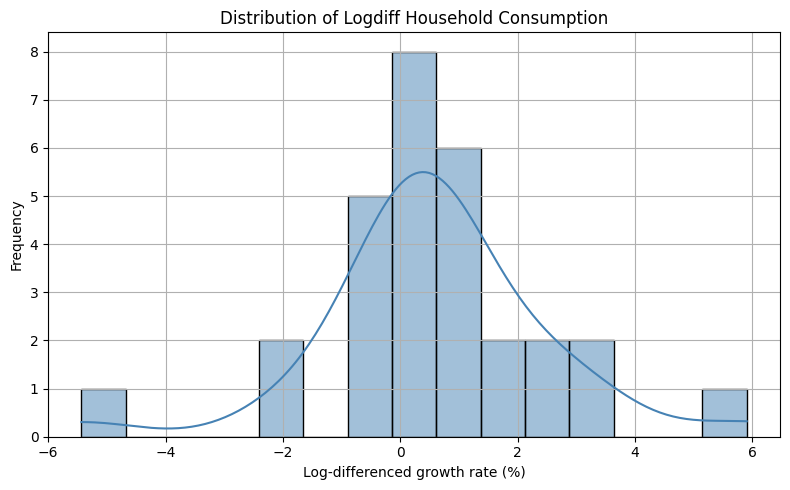

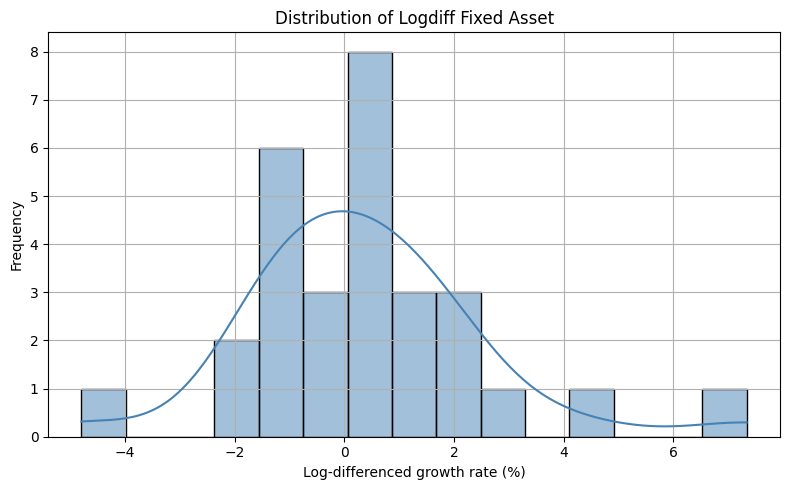

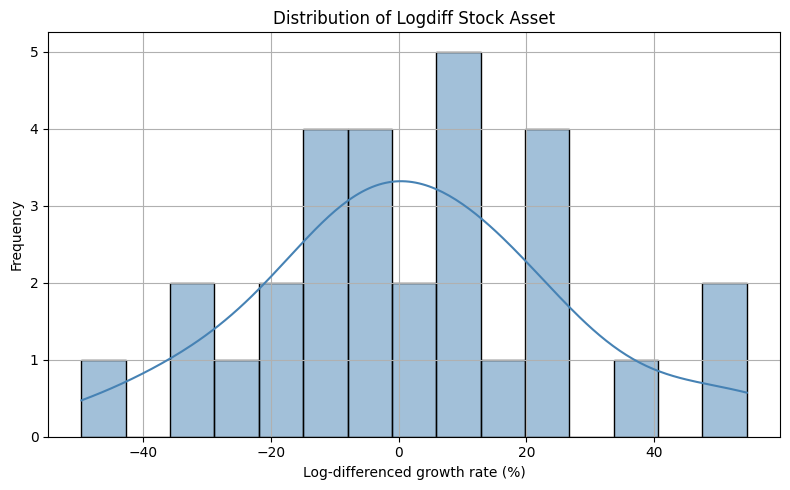

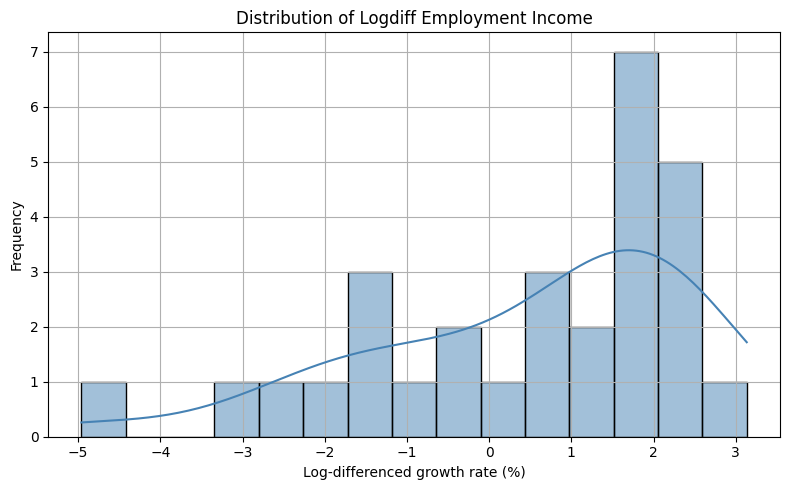

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms with KDE for each log-differenced variable
for col in logdiff_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(logdiff_data[col], bins=15, kde=True, color='steelblue')
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel("Log-differenced growth rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


1️⃣ Household Consumption
- The distribution is tightly clustered around 0%, showing that consumption changes only slightly each year. The slight right skew suggests occasional years of stronger positive growth, but overall variability is low.

2️⃣ Fixed Asset
- Also centered around zero, with a similar spread to consumption. Most changes are within ±2%, indicating that housing-related wealth changes are gradual and stable over time.

3️⃣ Stock Asset
- This distribution is wider and flatter, reflecting the high volatility of financial assets. While the mean is near 0%, individual years can see large positive or negative swings (from -40% to +50%).

4️⃣ Employment Income
- Like consumption, income growth is concentrated near 0–2%, with a modest right skew. This suggests stable, incremental increases in labor income, consistent with macroeconomic trends in wages.

- Shapiro-Wilk Normality Test

In [85]:
from scipy.stats import shapiro

# Initialize groups
normal_vars = []       # Passed normality test (p >= 0.05)
non_normal_vars = []   # Failed normality test (p < 0.05)

print("Shapiro-Wilk Normality Test for Log-Differenced Growth Rates:\n")

# Run the test for each log-differenced variable
for col in logdiff_columns:
    stat, p = shapiro(logdiff_data[col].dropna())
    result = f"{col}: W = {stat:.4f}, p-value = {p:.4f}"

    if p >= 0.05:
        normal_vars.append(result)
    else:
        non_normal_vars.append(result)

# Output grouped results
print("Passed (Approximately Normal):")
for r in normal_vars:
    print("  ", r)

print("\nFailed (Not Normal):")
for r in non_normal_vars:
    print("  ", r)


Shapiro-Wilk Normality Test for Log-Differenced Growth Rates:

Passed (Approximately Normal):
   logdiff_stock_asset: W = 0.9795, p-value = 0.8244

Failed (Not Normal):
   logdiff_household_consumption: W = 0.9064, p-value = 0.0140
   logdiff_fixed_asset: W = 0.9192, p-value = 0.0291
   logdiff_employment_income: W = 0.9009, p-value = 0.0103


## 5.3 Overall 

### 5.3.1 Scatter Plot

#### 5.3.1.1 EU

Correlation Matrix:
                  consumption  housing_wealth  financial_assets  income
consumption             1.000           0.942             0.932   0.955
housing_wealth          0.942           1.000             0.944   0.951
financial_assets        0.932           0.944             1.000   0.940
income                  0.955           0.951             0.940   1.000


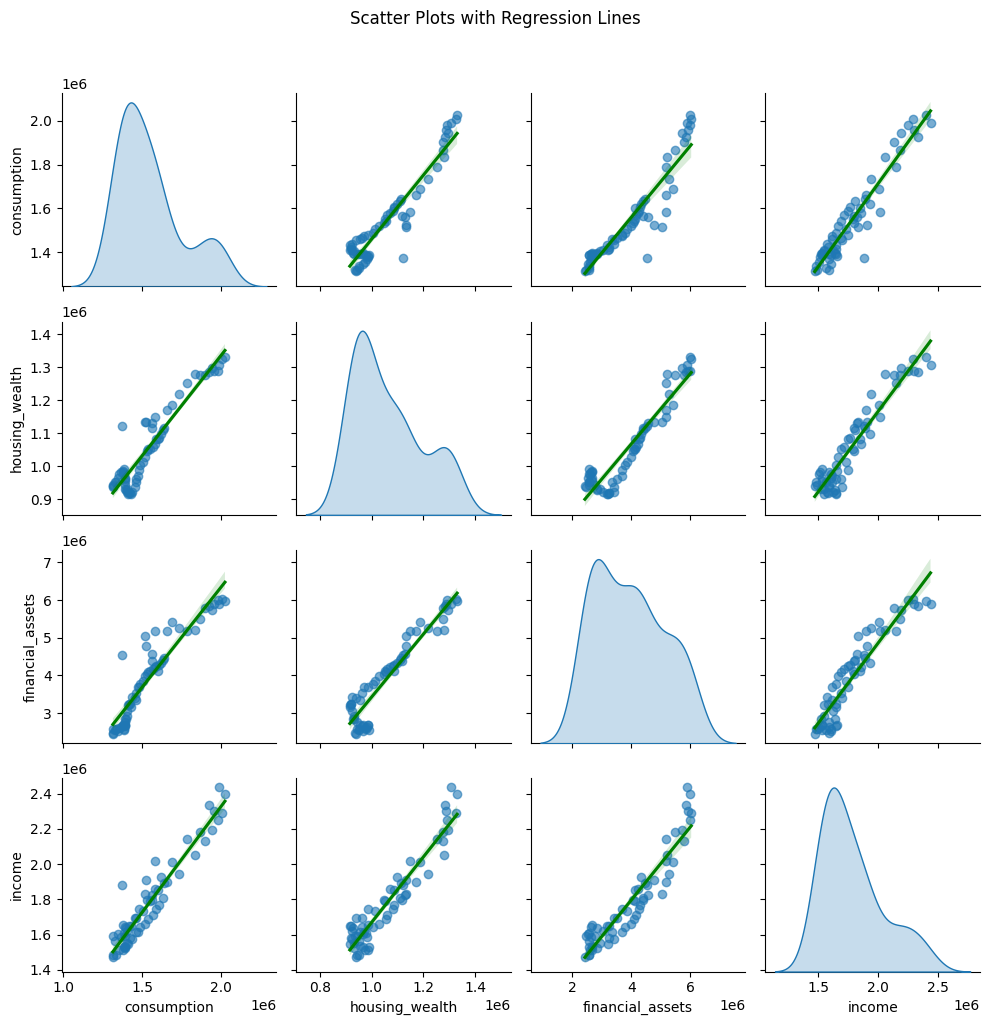

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data
merged_path = "data/clean/EU/merged_eu_data.csv"
df = pd.read_csv(merged_path, parse_dates=['date'])
df = df[['date', 'consumption', 'housing_wealth', 'financial_assets', 'income']]
df = df.sort_values('date').reset_index(drop=True)

# Correlation matrix
data_for_corr = df[['consumption', 'housing_wealth', 'financial_assets', 'income']]
corr_matrix = data_for_corr.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Scatter Plots
sns.pairplot(data_for_corr, kind="reg", diag_kind="kde", 
             plot_kws={"line_kws": {"color": "green"}, "scatter_kws": {"alpha": 0.6}})
plt.suptitle("Scatter Plots with Regression Lines", y=1.02)
plt.tight_layout()
plt.show()

#### 5.3.1.2 Japan

Check the relationship between variables

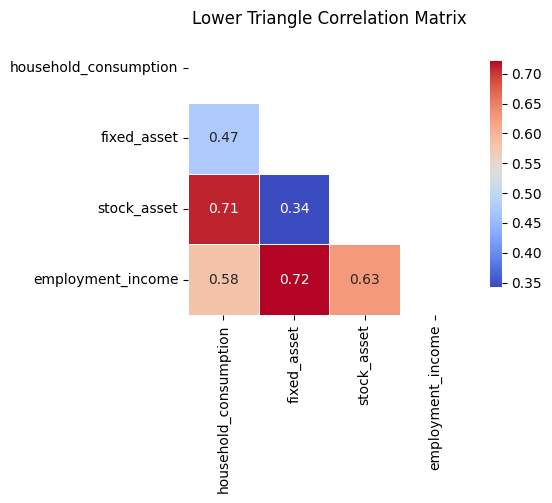

In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Select the four macroeconomic variables
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
data_for_corr = merged_data[value_columns]

# Compute correlation matrix
corr_matrix = data_for_corr.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with mask
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title("Lower Triangle Correlation Matrix")
plt.tight_layout()
plt.show()

Draw scatter plot in row level

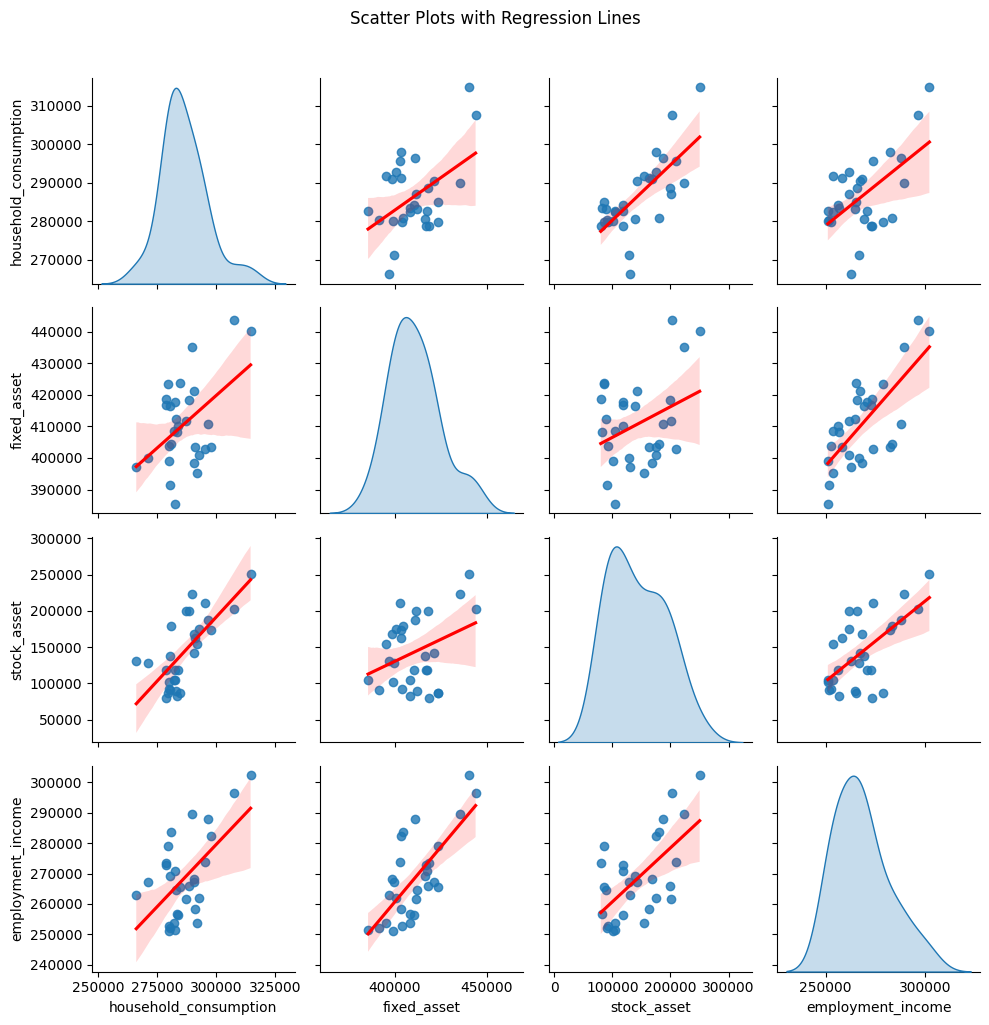

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# set variables
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
data_for_plot = merged_data[value_columns]

# Scatter Plots
sns.pairplot(data_for_plot, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
plt.suptitle("Scatter Plots with Regression Lines", y=1.02)
plt.tight_layout()
plt.show()

Draw scatter plot of Log-Differenced Growth Rate

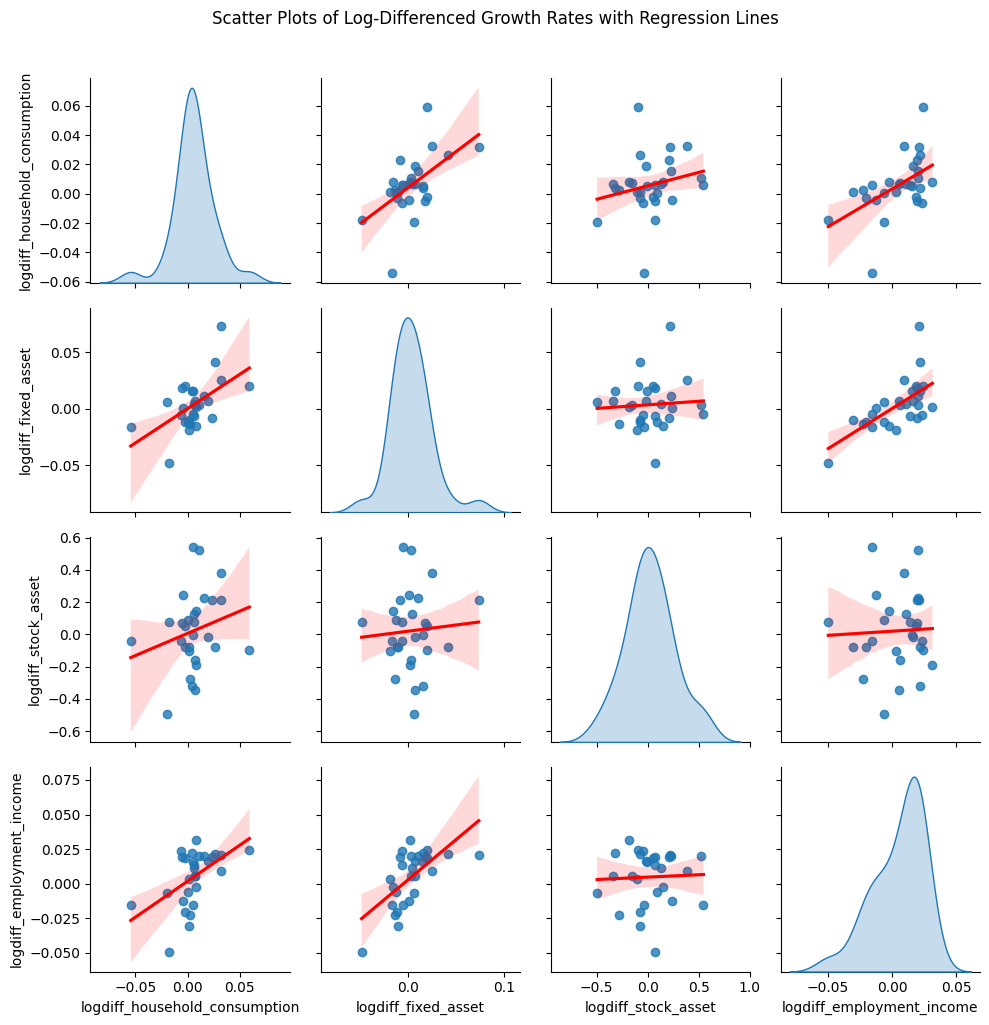

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Select the four macroeconomic variables
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
df = merged_data[value_columns]

# Calculate Log-Differenced Growth Rate
logdiff_data = df.copy()
for col in value_columns:
    logdiff_data[f"logdiff_{col}"] = np.log(df[col]).diff()

# Delete NaN
logdiff_data = logdiff_data.dropna().reset_index(drop=True)

# Get data for plot
logdiff_columns = [f"logdiff_{col}" for col in value_columns]
data_for_plot = logdiff_data[logdiff_columns]

# Plot scatter with regression lines
sns.pairplot(data_for_plot, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
plt.suptitle("Scatter Plots of Log-Differenced Growth Rates with Regression Lines", y=1.02)
plt.tight_layout()
plt.show()

Dashboard with all variables

In [90]:
import subprocess
import time

# Run the Streamlit app and automatically press Enter to skip email prompt
process = subprocess.Popen(
    ["streamlit", "run", "src/dashboard_app/japan_dashboard.py"],
    stdin=subprocess.PIPE,
)

# Send newline to skip the email prompt
process.stdin.write(b"\n")
process.stdin.flush()

# Wait for the server to start
time.sleep(3)

### 5.3.2 Radar Chart (growth rate)


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.100.143.221:8501



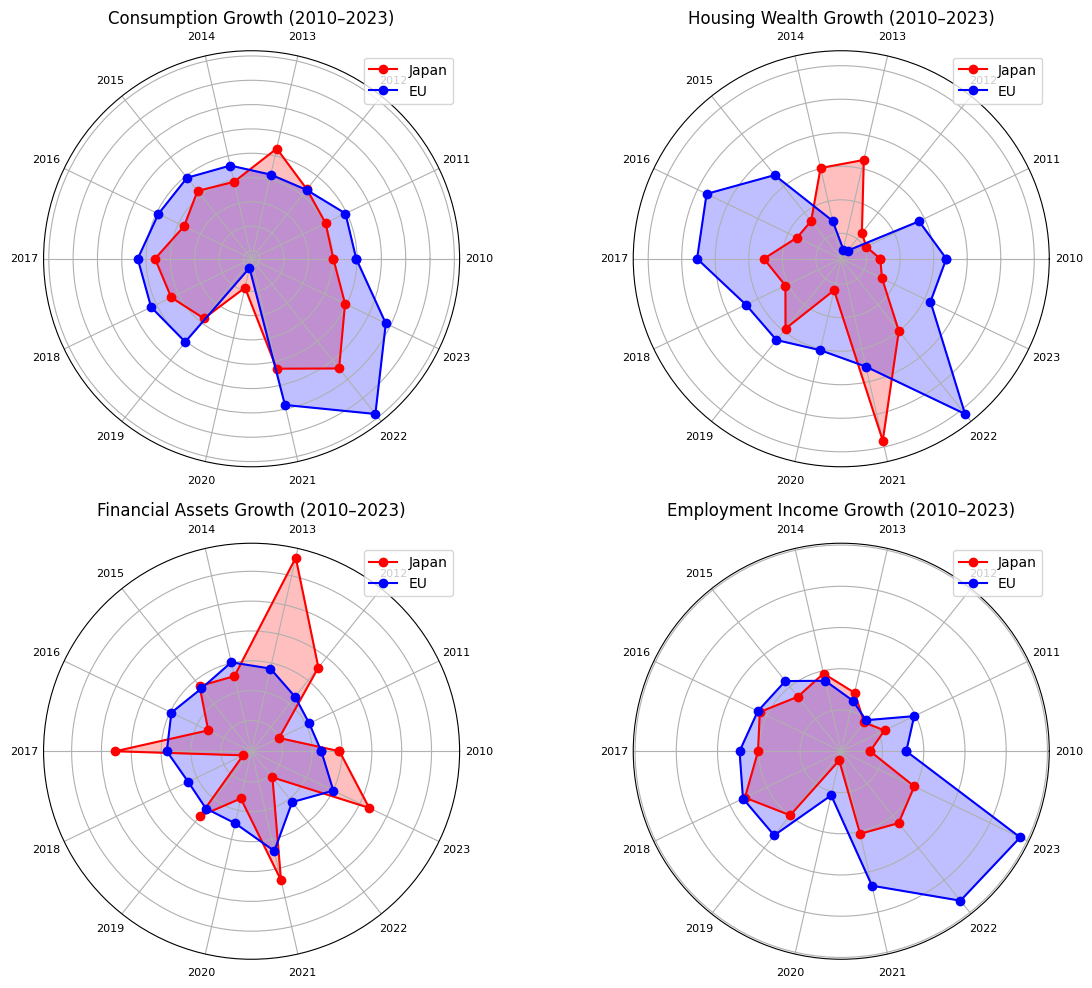

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and process EU data
eu_path = "data/clean/EU/merged_eu_data.csv"
eu = pd.read_csv(eu_path, parse_dates=['date'])
eu['year'] = eu['date'].dt.year

# Aggregate quarterly data to yearly average
eu_vars = ['consumption', 'housing_wealth', 'financial_assets', 'income']
eu_annual = eu.groupby('year')[eu_vars].sum() / 4

# Compute year-over-year growth rates
eu_growth = eu_annual.pct_change() * 100
eu_growth = eu_growth.rename(columns={
    'consumption': 'consumption_growth',
    'housing_wealth': 'housing_growth',
    'financial_assets': 'finance_growth',
    'income': 'income_growth'
})
eu_growth = eu_growth.loc[2010:2023]

# Load and process Japan data
japan_path = "data/clean/japan/merged_macro_data.csv"
japan = pd.read_csv(japan_path)
japan['year'] = japan['year'].astype(int)

# Aggregate yearly data and compute growth rates
japan_vars = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
japan_annual = japan.groupby('year')[japan_vars].mean()
japan_growth = japan_annual.pct_change() * 100
japan_growth = japan_growth.rename(columns={
    'household_consumption': 'consumption_growth',
    'fixed_asset': 'housing_growth',
    'stock_asset': 'finance_growth',
    'employment_income': 'income_growth'
})
japan_growth = japan_growth.loc[2010:2023]

# Define variables and labels for radar charts
growth_vars = {
    'consumption_growth': 'Consumption Growth',
    'housing_growth': 'Housing Wealth Growth',
    'finance_growth': 'Financial Assets Growth',
    'income_growth': 'Employment Income Growth'
}

years = list(range(2010, 2024))
angles = np.linspace(0, 2 * np.pi, len(years), endpoint=False).tolist()
angles += angles[:1]

# Create 2x2 radar plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for ax, (var_key, var_label) in zip(axes, growth_vars.items()):
    jp_values = japan_growth.loc[years][var_key].tolist()
    eu_values = eu_growth.loc[years][var_key].tolist()
    jp_values += [jp_values[0]]
    eu_values += [eu_values[0]]

    ax.plot(angles, jp_values, color='red', marker='o', label='Japan')
    ax.fill(angles, jp_values, color='red', alpha=0.25)

    ax.plot(angles, eu_values, color='blue', marker='o', label='EU')
    ax.fill(angles, eu_values, color='blue', alpha=0.25)

    ax.set_title(f"{var_label} (2010–2023)", fontsize=12)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([str(y) for y in years], fontsize=8)
    ax.set_yticklabels([])
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Summary Comparison of Macroeconomic Growth (Japan vs. EU, 2010–2023)

| **Indicator**              | **Japan**                                         | **European Union**                 |
|----------------------------|---------------------------------------------------|------------------------------------|
| **Consumption Growth**     | Strongly affected by COVID-19, slow recovery      | Strong post-pandemic rebound       |
| **Housing Wealth Growth**  | Highly volatile                                  | Steady and continuous              |
| **Financial Assets Growth**| Highly sensitive to market fluctuations           | More stable trend                  |
| **Employment Income Growth**| Slow growth                                     | Strong growth in recent years      |




# 6. Regression

## Empirical Strategy

Basic Idea:

In general, changes in assets and income in the current period do not necessarily have an immediate impact on consumption in the same period. Spillover to consumption as asset effect → Usually effect in the following period or later.

- Conduct a regression based on the following model (lag 1):

$$
log C_{t} = \beta_0 + \beta_1 log H_{t-1} + \beta_2 log F_{t-1} + \beta_3 log Y_{t-1} + \varepsilon_{t}
$$

- Where:

\begin{array}{ll}
C_t & : \text{Household consumption} \\
H_{t-1} & : \text{Lagged housing wealth} \\
F_{t-1} & : \text{Lagged financial wealth (e.g., stocks, bonds)} \\
Y_{t-1} & : \text{Lagged employment income} \\
\varepsilon_t & : \text{Error term}
\end{array}

Main Focus

- Estimate and interpret the elasticities:

\begin{array}{ll}
\beta_1 & : \text{Elasticity of consumption with respect to housing wealth (lagged)} \\
\beta_2 & : \text{Elasticity of consumption with respect to financial wealth (lagged)} \\
\beta_3 & : \text{Elasticity of consumption with respect to employment income (lagged)}
\end{array}

## 6.1 EU

Prepare variables

In [92]:
import pandas as pd
import numpy as np

# Load merged EU macroeconomic data
merged_path = "data/clean/EU/merged_eu_data.csv"
df = pd.read_csv(merged_path, parse_dates=['date'])

# Keep relevant variables and sort by date
df = df[['date', 'consumption', 'housing_wealth', 'financial_assets', 'income']]
df = df.sort_values('date').reset_index(drop=True)

# Compute quarter-on-quarter (QoQ) growth rates in percent
df['consumption_growth'] = df['consumption'].pct_change() * 100
df['housing_growth'] = df['housing_wealth'].pct_change() * 100
df['finance_growth'] = df['financial_assets'].pct_change() * 100
df['income_growth'] = df['income'].pct_change() * 100

# Apply logarithmic transformation to level variables
df['log_consumption'] = np.log(df['consumption'])
df['log_housing'] = np.log(df['housing_wealth'])
df['log_finance'] = np.log(df['financial_assets'])
df['log_income'] = np.log(df['income'])

# Compute first differences of log-transformed variables (log-diff ≈ continuous growth)
df['logdiff_consumption'] = df['log_consumption'].diff()
df['logdiff_housing'] = df['log_housing'].diff()
df['logdiff_finance'] = df['log_finance'].diff()
df['logdiff_income'] = df['log_income'].diff()

# Drop rows with any missing values (e.g. first row after diff or pct_change)
df_clean = df.dropna().reset_index(drop=True)


### 6.1.1 Modeling of Long-run (log)

In [93]:
import pandas as pd
import statsmodels.api as sm

# Resotre the result in a list
results = []
max_lag = 13

for lag in range(1, max_lag + 1):
    X_lagged = df[['log_income', 'log_housing', 'log_finance']].shift(lag)
    y = df['log_consumption']

    valid = (~X_lagged.isnull().any(axis=1)) & (~y.isnull())
    X_lagged = X_lagged[valid].reset_index(drop=True)
    y_valid = y[valid].reset_index(drop=True)

    X_lagged = sm.add_constant(X_lagged)
    model = sm.OLS(y_valid, X_lagged).fit()

    results.append({
        'lag': lag,
        'AIC': model.aic,
        'BIC': model.bic,
        'R2': model.rsquared,
        'income_pval': model.pvalues.get('log_income', None),
        'housing_pval': model.pvalues.get('log_housing', None),
        'finance_pval': model.pvalues.get('log_finance', None)
    })

# DataFrame and print
results_df = pd.DataFrame(results)
pd.options.display.float_format = '{:.3f}'.format
print(results_df)


    lag      AIC      BIC    R2  income_pval  housing_pval  finance_pval
0     1 -239.523 -230.951 0.923        0.000         0.043         0.015
1     2 -228.140 -219.631 0.912        0.004         0.022         0.004
2     3 -222.445 -214.002 0.908        0.011         0.027         0.002
3     4 -213.008 -204.630 0.898        0.180         0.009         0.000
4     5 -208.082 -199.772 0.894        0.098         0.025         0.000
5     6 -199.300 -191.059 0.884        0.438         0.021         0.000
6     7 -190.055 -181.883 0.870        0.306         0.045         0.000
7     8 -181.747 -173.646 0.858        0.728         0.025         0.000
8     9 -175.781 -167.752 0.850        0.266         0.090         0.000
9    10 -167.696 -159.740 0.836        0.470         0.116         0.000
10   11 -161.463 -153.581 0.825        0.259         0.226         0.000
11   12 -154.707 -146.902 0.812        0.404         0.208         0.000
12   13 -151.600 -143.873 0.811        0.098       

**Conclusion: lag = 1 should be selected**
- Evaluation: 
    - AIC/BIC: Lowest (best model)
    - R² (explanatory power): Highest (0.923)
    - Coefficient p-values (significance): All significant below 5%.

In [94]:
import statsmodels.api as sm

# Prepare dependent and independent variables
X = df[['log_income', 'log_housing', 'log_finance']].shift(1).dropna()
y = df['log_consumption'].iloc[1:]
y = y.reset_index(drop=True)
X = X.reset_index(drop=True)

# Add constant term
X = sm.add_constant(X)

# Robust OLS with HC3 standard errors (heteroskedasticity-consistent)
print("\nRobust OLS (HC3)")
robust_ols_model = sm.OLS(y, X).fit(cov_type='HC3')
print(robust_ols_model.summary())



Robust OLS (HC3)
                            OLS Regression Results                            
Dep. Variable:        log_consumption   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     369.7
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           3.40e-38
Time:                        17:22:46   Log-Likelihood:                 123.76
No. Observations:                  63   AIC:                            -239.5
Df Residuals:                      59   BIC:                            -231.0
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4217      0.65

| Variable               | Coefficient | Interpretation (Elasticity)                                     | p-value |
|------------------------|-------------|------------------------------------------------------------------|---------|
| log(income)            | 0.471       | A 1% increase in income leads to a 0.47% increase in consumption | 0.000***   |
| log(housing wealth)    | 0.250       | A 1% increase in housing wealth leads to a 0.25% increase        | 0.009***   |
| log(financial wealth)  | 0.105       | A 1% increase in financial wealth leads to a 0.11% increase      | 0.004***   |
| Constant               | 2.422       | Baseline consumption level                                       | 0.000***   |


#### Key Findings (Robust OLS – HC3):

- All variables are statistically significant (p < 0.01 to 0.009) and the lag = 1 model is strong.

- In particular, income has the highest elasticity (0.47) and has the greatest impact on consumption.

- Housing and financial assets also significantly boost consumption, with a clear asset effect.

- There are signs of some problems with the residuals (non-normality, autocorrelation), but the model itself performs very well (R² = 0.923).



### 6.1.2 Modeling of Short-run (log-diff)

Model:

$$
\Delta \log C_{t} = \beta_0 + \beta_1 \Delta \log H_{t-n} + \beta_2 \Delta \log F_{t-n} + \beta_3 \Delta \log Y_{t-n} + \varepsilon_{t}
$$

- Where:

\begin{array}{ll}
\Delta \log C_t & : \text{Growth rate of household consumption} \\
\Delta \log H_{t-n} & : \text{Growth rate of housing wealth before lag n period} \\
\Delta \log F_{t-n} & : \text{Growth rate of financial wealth (e.g., stocks, bonds) before lag n period} \\
\Delta \log Y_{t-n} & : \text{Growth rate of employment income before lag n period} \\
\varepsilon_t & : \text{Error term}
\end{array}


In [95]:
import pandas as pd
import statsmodels.api as sm

results_diff = []
max_lag = 13

for lag in range(1, max_lag + 1):
    X_lagged = df[['logdiff_income', 'logdiff_housing', 'logdiff_finance']].shift(lag)
    y = df['logdiff_consumption']

    valid = (~X_lagged.isnull().any(axis=1)) & (~y.isnull())
    X_lagged = X_lagged[valid].reset_index(drop=True)
    y_valid = y[valid].reset_index(drop=True)

    X_lagged = sm.add_constant(X_lagged)
    model = sm.OLS(y_valid, X_lagged).fit()

    results_diff.append({
        'lag': lag,
        'AIC': model.aic,
        'BIC': model.bic,
        'R2': model.rsquared,
        'income_pval': model.pvalues.get('logdiff_income', None),
        'housing_pval': model.pvalues.get('logdiff_housing', None),
        'finance_pval': model.pvalues.get('logdiff_finance', None)
    })

results_diff_df = pd.DataFrame(results_diff)
pd.options.display.float_format = '{:.3f}'.format
results_diff_df

,lag,AIC,BIC,R2,income_pval,housing_pval,finance_pval
0,1,-277.562,-269.054,0.144,0.130,0.052,0.014
1,2,-263.849,-255.405,0.021,0.457,0.643,0.540
2,3,-258.643,-250.266,0.025,0.300,0.703,0.512
3,4,-254.437,-246.127,0.045,0.242,0.333,0.598
4,5,-249.210,-240.968,0.049,0.196,0.305,0.694
5,6,-246.913,-238.740,0.099,0.542,0.567,0.031
6,7,-237.631,-229.529,0.036,0.400,0.419,0.451
7,8,-232.591,-224.562,0.042,0.193,0.519,0.893
8,9,-227.429,-219.473,0.045,0.184,0.557,0.440
9,10,-220.639,-212.758,0.018,0.374,0.749,1.000


In [96]:
import statsmodels.api as sm

# Shift explanatory variables by 1 period
X = df[['logdiff_housing', 'logdiff_finance', 'logdiff_income']].iloc[:-1].reset_index(drop=True)
y = df['logdiff_consumption'].iloc[1:].reset_index(drop=True)

# Drop any rows with NaNs in either X or y (align index)
valid = (~X.isnull().any(axis=1)) & (~y.isnull())
X = X[valid]
y = y[valid]

# Reset index for both
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Add constant
X = sm.add_constant(X)

# Robust OLS
print("\nRobust OLS (HC3)")
robust_model = sm.OLS(y, X).fit(cov_type='HC3')
print(robust_model.summary())

# GLS
print("\nGeneralized Least Squares (GLS)")
gls_model = sm.GLS(y, X).fit()
print(gls_model.summary())


Robust OLS (HC3)
                             OLS Regression Results                            
Dep. Variable:     logdiff_consumption   R-squared:                       0.144
Model:                             OLS   Adj. R-squared:                  0.099
Method:                  Least Squares   F-statistic:                     2.647
Date:                 Mon, 02 Jun 2025   Prob (F-statistic):             0.0574
Time:                         17:22:46   Log-Likelihood:                 142.78
No. Observations:                   62   AIC:                            -277.6
Df Residuals:                       58   BIC:                            -269.1
Df Model:                            3                                         
Covariance Type:                   HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const         

| Variable                   | Coefficient | Interpretation (Elasticity)                                                | p-value   |
|----------------------------|-------------|-----------------------------------------------------------------------------|-----------|
| logdiff(housing wealth)    | 0.702       | A 1% increase in housing wealth (lagged) leads to a 0.70% increase in consumption growth | 0.006***  |
| logdiff(financial wealth)  | 0.346       | A 1% increase in financial wealth (lagged) leads to a 0.35% increase in consumption growth | 0.072*   |
| logdiff(income)            | 0.082       | A 1% increase in income (lagged) leads to a 0.08% increase in consumption growth | 0.150     |
| Constant                   | -0.0026     | Baseline change in consumption (growth rate)                               | 0.676     |


#### Key Findings (Robust OLS – HC3):

- Housing asset growth (lag 1) has the strongest short-term impact on consumption (p = 0.006)

- Financial assets also moderately effective but somewhat unstable (p = 0.072)

- Income growth is not statistically significant in the short run (p = 0.150)

- Durbin-Watson = 2.41 → almost no autocorrelation

- Model has limited explanatory power (R²) → Reasonable for a short-term model, but room for improvement

## 6.2 Japan

### 6.2.1 Modeling of Long-run 

#### Empirical Strategy (Long-Run Specification)

- Conduct a regression based on the following model:

$$
\log C_{t} = \alpha + \beta \log S_{t-1} + \gamma \log H_{t-1} + \phi \log Y_{t-1} + \varepsilon_{t}
$$

- Where:

\begin{array}{ll}
C_{t} & : \text{Household consumption} \\
S_{t-1} & : \text{Lagged stock market wealth} \\
H_{t-1} & : \text{Lagged housing wealth} \\
Y_{t-1} & : \text{Lagged employment income} \\
\varepsilon_{t} & : \text{Error term}
\end{array}

#### Main Focus

- Estimate and interpret long-run elasticities:

\begin{array}{ll}
\gamma & : \text{Elasticity of consumption with respect to housing wealth} \\
\beta & : \text{Elasticity of consumption with respect to stock market wealth} \\
\phi & : \text{Elasticity of consumption with respect to income}
\end{array}


 - Make values become log-transformed variables.

In [97]:
import numpy as np 

# Create log-transformed variables
merged_data["log_household_consumption"] = np.log(merged_data["household_consumption"])
merged_data["log_fixed_asset"] = np.log(merged_data["fixed_asset"])
merged_data["log_stock_asset"] = np.log(merged_data["stock_asset"])
merged_data["log_employment_income"] = np.log(merged_data["employment_income"])

# Check
print(merged_data[["log_household_consumption", "log_fixed_asset", "log_stock_asset", "log_employment_income"]].head())


   log_household_consumption  log_fixed_asset  log_stock_asset  \
0                     12.492           12.892           11.783   
1                     12.511           12.899           11.766   
2                     12.538           12.941           11.685   
3                     12.542           12.956           11.368   
4                     12.539           12.945           11.291   

   log_employment_income  
0                 12.479  
1                 12.495  
2                 12.517  
3                 12.539  
4                 12.519  


In [103]:
import statsmodels.api as sm

# Prepare variables
X = merged_data[["log_fixed_asset", "log_stock_asset", "log_employment_income"]].shift(1).dropna()
y = merged_data["log_household_consumption"].iloc[1:]
X = sm.add_constant(X)  # constant term
y = y.reset_index(drop=True)
X = X.reset_index(drop=True)

# Run OLS regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Run Robust OLS
robust_ols_model = sm.OLS(y, X).fit(cov_type='HC3')
print(robust_ols_model.summary())

# Fit Generalized Least Squares (assumes known structure of heteroscedasticity or correlation)
gls_model = sm.GLS(y, X).fit()
print(gls_model.summary())

# Fit Generalized Linear Model with Gaussian family (similar to OLS)
glm_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()
print(glm_model.summary())

                                OLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.496
Model:                                   OLS   Adj. R-squared:                  0.436
Method:                        Least Squares   F-statistic:                     8.202
Date:                       Mon, 02 Jun 2025   Prob (F-statistic):           0.000571
Time:                               17:31:54   Log-Likelihood:                 69.727
No. Observations:                         29   AIC:                            -131.5
Df Residuals:                             25   BIC:                            -126.0
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### Key Findings (Robust OLS – HC3):

 - The elasticity of equity assets to consumption (0.063) is small but statistically significant. This suggests that the short-term effect of stock prices may be immediate.

 - The coefficient on housing assets (0.237) is larger but not significant. Perhaps the effect appears late or is collinear with other variables.

 - Employment income is statistically insignificant (p=0.864). This indicates either a limitation as an explanatory variable or a limitation of the data sample.

### 6.2.2 Modeling of Short-run 

#### Empirical Strategy (Short-Run Specification)

- Estimate the short-run relationship using the following model:

$$
\Delta \log C_{t} = \alpha + \beta \Delta \log S_{t-1} + \gamma \Delta \log H_{t-1} + \phi \Delta \log Y_{t-1} + \varepsilon_{t}
$$

- Where:

\begin{array}{ll}
\Delta \log C_{t} & : \text{Growth rate of household consumption} \\
\Delta \log S_{t-1} & : \text{Lagged growth rate of stock market wealth} \\
\Delta \log H_{t-1} & : \text{Lagged growth rate of housing wealth} \\
\Delta \log Y_{t-1} & : \text{Lagged growth rate of employment income} \\
\varepsilon_{t} & : \text{Error term}
\end{array}

#### Main Focus

- Assess short-run impacts of asset and income growth on consumption growth:

\begin{array}{ll}
\gamma & : \text{Short-run elasticity of consumption with respect to housing wealth growth} \\
\beta & : \text{Short-run elasticity with respect to stock market wealth growth} \\
\phi & : \text{Short-run elasticity with respect to income growth}
\end{array}


#### 6.2.2.1 Robust OLS

In [105]:
import statsmodels.api as sm

y = logdiff_data["logdiff_household_consumption"].iloc[1:]
X = logdiff_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income"
]].shift(1).dropna()
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type="HC3")  # Use robust SE due to potential non-normality
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     logdiff_household_consumption   R-squared:                       0.104
Model:                                       OLS   Adj. R-squared:                 -0.008
Method:                            Least Squares   F-statistic:                    0.7477
Date:                           Mon, 02 Jun 2025   Prob (F-statistic):              0.534
Time:                                   17:33:51   Log-Likelihood:                 72.272
No. Observations:                             28   AIC:                            -136.5
Df Residuals:                                 24   BIC:                            -131.2
Df Model:                                      3                                         
Covariance Type:                             HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
------

Part 1: Residual Diagnostics (Normality & Autocorrelation)

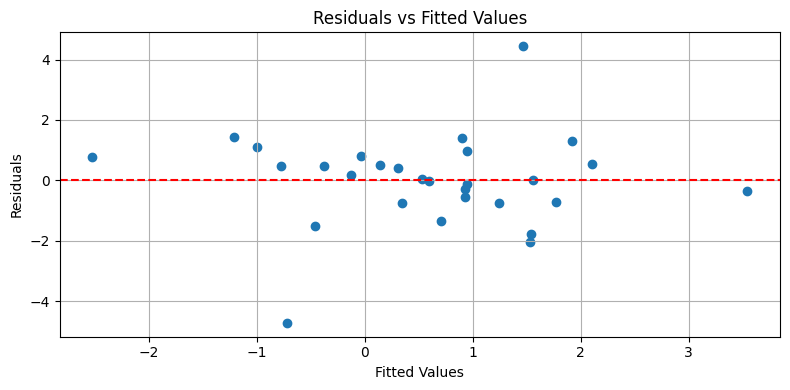

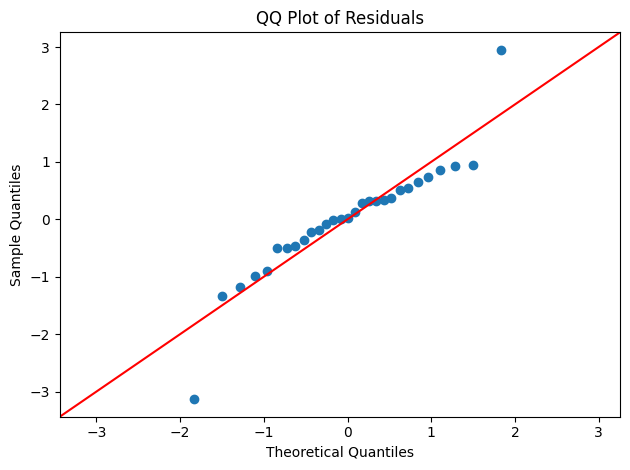

Ljung-Box Test for Autocorrelation (lag=1):
    lb_stat  lb_pvalue
1  1.789977   0.180929


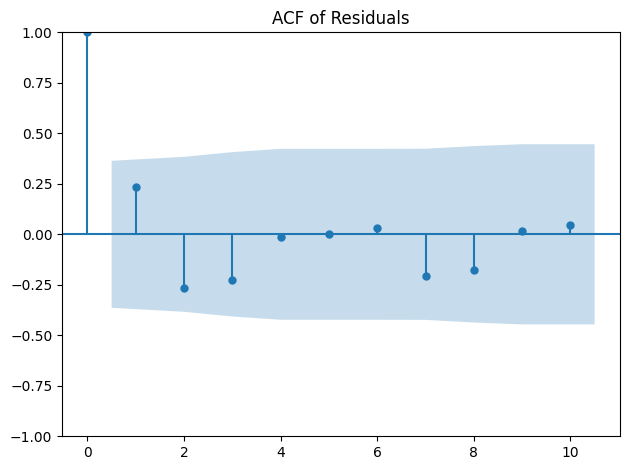

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import probplot

# residual
residuals = model.resid

# Residuals vs Fitted Values
plt.figure(figsize=(8, 4))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# QQ plot (check normality of residuals)
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

# Ljung-Box test for autocorrelation (lag 1)
lb_test = acorr_ljungbox(residuals, lags=[1], return_df=True)
print("Ljung-Box Test for Autocorrelation (lag=1):")
print(lb_test)

# Autocorrelation Function (ACF) plot of residuals
sm.graphics.tsa.plot_acf(residuals, lags=10)
plt.title("ACF of Residuals")
plt.tight_layout()
plt.show()


### Regression Diagnostics Summary

- **Residuals vs Fitted Values**: The plot shows no clear patterns or funnel shapes, suggesting that the residuals have constant variance and that the model is correctly specified.

- **QQ Plot of Residuals**: Most residuals lie along the 45-degree line, indicating approximate normality. Some deviations at the tails suggest mild non-normality, which is addressed by using robust standard errors (HC3).

- **ACF Plot**: The autocorrelation function shows no significant autocorrelation in residuals up to 10 lags. This confirms the independence assumption holds.

Overall, diagnostic plots support the validity of the linear regression model with robust standard errors.


Part 2: Regression with Lagged Dependent Variable (AR(1) Model)

In [ ]:
# Add one-period lag of the dependent variable
logdiff_data["logdiff_household_consumption_lag1"] = logdiff_data["logdiff_household_consumption"].shift(1)

# Drop missing value due to lag
ar_data = logdiff_data.dropna().copy()

# Define y and X including AR(1) term
y_ar = ar_data["logdiff_household_consumption"]
X_ar = ar_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income",
    "logdiff_household_consumption_lag1"  # AR(1) term
]]
X_ar = sm.add_constant(X_ar)

# Fit OLS model with robust standard errors
ar_model = sm.OLS(y_ar, X_ar).fit(cov_type='HC3')

# Show summary
print("OLS with AR(1) Term:")
print(ar_model.summary())


OLS with AR(1) Term:
                                  OLS Regression Results                                 
Dep. Variable:     logdiff_household_consumption   R-squared:                       0.426
Model:                                       OLS   Adj. R-squared:                  0.326
Method:                            Least Squares   F-statistic:                     3.129
Date:                           Wed, 14 May 2025   Prob (F-statistic):             0.0342
Time:                                   09:55:52   Log-Likelihood:                -50.445
No. Observations:                             28   AIC:                             110.9
Df Residuals:                                 23   BIC:                             117.6
Df Model:                                      4                                         
Covariance Type:                             HC3                                         
                                         coef    std err          z      P>|z| 

#### Key Findings (Robust OLS – HC3):

 - None of the explanatory variables has a statistically significant impact on short-term consumption changes.

 - The coefficient on logdiff_fixed_asset is relatively large (0.24), but is unreliable due to large uncertainty.

 - The short-term model (log-diff) does not explain the growth rate of consumption well for either finance, housing, or income.

# 7. Finding and Summary

- Key Findings:
    - EU:
      - Household consumption exhibits a steady upward trend over time, closely tracking the rise in employment income and housing wealth.
      - A sharp decline in 2020, followed by a swift rebound, reflects the consumption shock caused by the COVID-19 pandemic and subsequent recovery.
      - In the long-run model:
        - employment income, housing wealth, and financial assets—are positively and significantly associated with household consumption.
        - Among these, income has the largest and most statistically robust effect, suggesting a strong income-consumption linkage over time.
      - In the short-run model:
        - Only housing wealth growth is significantly correlated with changes in consumption.
        - Changes in income and financial wealth do not exhibit significant short-term impacts on consumption growth.
    - Japan:  
      - In the short-run model, stock market wealth (financial assets) has a statistically significant positive effect on household consumption, indicating that capital gains may directly influence consumer behavior in Japan.
      - Although housing wealth has a relatively larger coefficient, it is not statistically significant, implying that short-run consumption is less responsive to changes in real estate values.
      - Employment income shows no significant short-run effect, possibly reflecting Japan's stable and slow-changing wage system.

### EU: 
 - To Research Question: Does household consumption increase with household wealth?
   - Yes – Strong Long-Run Relationship
   - Conclusion: In the EU, household consumption increases with household wealth in the long run, especially with stable income and rising real estate and financial asset values.
### Japan: 
 - To Research Question: Does household consumption increase with household wealth?
   - Partially – Short-Run Sensitivity to Financial Wealth
   - Conclusion: In Japan, short-term consumption responds mainly to financial wealth, not housing or income.
